### Scenario given:

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?


#### Dataset: Salifort Motors employee satisfaction survey results, formatted as csv file containing 10 columns and 15.000 rows.
***
#### Understanding the information in the dataset:
**1. satisfaction_level** - decimal values betwen 0 and 1. The higher the value, the higher an employee's satisfaction level.
<br>
**2. last_evaluation** - decimal values betwen 0 and 1. A higher value means a higher evaluation score. We do not have any information regarding when the evaluation was made and how often the employees are evaluated. We also do not have information on the metrics used for these evaluation scores.
<br>
**3. number_project** - different values between 2 and 7 which indicate how many projects each employee has.
<br>
**4. average_monthly_hours** - different 3 digit numbers representing the average monthly hours each employee worked in the company.
<br>
**5. time_spend_company** - values representing how much time an employee spent in the company. Values represent the job tenure in years.
<br>
**6. Work_accident** - values between 0 and 1, showing whether an employee had a work-related accident during his employment time or not.
<br>
**7. left**	- values between 0 and 1, showing whether an employee has left the company or not.
<br>
**8. promotion_last_5years** - values between 0 and 1, showing whether an employee was promoted in the past 5 years or not.
<br>
**9. Department** - contains different department names, representing where an employee works in the company.
<br>
**10. salary** - contains 3 different values, "low", "medium" and "high". It represents the salary category of each employee.
<br>

### Load the dataset into the workbook, along with any libraries and packages required for the analysis.

In [1]:
# Importing necessary packages

# Packages required for data manipulation
import numpy as np
import pandas as pd

# Packages required for data visualization
import matplotlib.pyplot as plt
from matplotlib.scale import LogScale
import seaborn as sns

# Packages for data modeling
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Packages for metrics and useful useful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report                         
from sklearn.metrics import roc_auc_score, roc_curve

# Package required for saving models
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Initial Exploratory Data Analysis (EDA)

In [2]:
# Load the dataset into a dataframe
main_df = pd.read_csv("cap_proj_dataset.csv")

# Set the option to have all the columns displayed in the dataframe
pd.set_option("display.max_columns", None)

In [3]:
# Display our newly created dataframe:
main_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# Dataframe size:
main_df.shape

(14999, 10)

In [5]:
# Brief summary of the dataframe:
main_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Descriptive statistics of the dataframe
main_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Based on this brief summary, there are as few interesing points that stand out regarding employee satisfaction and monthly hours worked:
**1.** **Satisfaction Level:**
<br>

**Overall Satisfaction**:
 -  The average satisfaction level among employees is approximately 61.28%.
 -  The minimum satisfaction level is 9%, suggesting that there are employees with very low satisfaction.
<br>

**Distribution:**
 -  The **satisfaction levels range from 9% to 100%**, indicating a diverse range of employee satisfaction within the dataset.
 -  The **data is slightly right-skewed**, as the **mean (61.28%)** is **lower than** the **median (64%)**.
<br>

**Variability:**
 -  The **standard deviation is 24.86%**, suggesting a **moderate level of variability in satisfaction levels** across employees.
<br>

**Quartiles:**
 -  The **IQR** spans **from 44% to 82%**, indicating that the middle 50% of employees have satisfaction levels within this range.
 
**2.** **Average Monthly Hours:**
 -  The average number of **monthly** hours worked is **approximately 201.05 hours**.
<br>

**Distribution:**
 -  Monthly working hours **range from 96 hours** (minimum) **to 310 hours** (maximum), showcasing a broad spectrum of working hour commitments.
<br>

**Variability:**
 -  The **standard deviation is 49.94 hours**, indicating a **notable variability in the number of hours worked by employees**.
<br>

**Quartiles:**
 -  The **IQR** spans **from 156 hours to 245 hours**, encompassing the middle 50% of employees in terms of monthly working hours.

### With some basic understanding of the data, cleaning the dataset comes next:

In [7]:
main_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Extracting the column names:
main_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

#### First issue encountered is that the column names do not have a standardized format. Also, there seems to be a misspelling in the "average_montly_hours", which we will need to address.

In [9]:
# Correcting any error and renaming columns where necessary:
main_df.rename(columns = {"Work_accident" : "work_accident",
                          "average_montly_hours" : "average_monthly_hours",
                          "time_spend_company" : "job_tenure",
                          "Department" : "department"
                         }, inplace = True)

# Now the columns in our dataset look like this:
main_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Checking for any missing values and summing them up.
main_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
job_tenure               0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### There are no missing values in this dataset. 
***
#### Next step would be checking for any duplicated values and handle them before proceeding any further with the analysis.

In [11]:
# Checking for duplicates:
dupes = main_df[main_df.duplicated() == True]
dupes["left"].value_counts()

left
1    1580
0    1428
Name: count, dtype: int64

In [12]:
# And summing them up for a total amount:
dupes.value_counts().sum()

3008

#### It seems that out of the 14999 total values, we have 3008 duplicates, which is roughly 20% of the entire dataset.

In [13]:
# Looking at the first 10 occurences of rows containing duplicated values.
main_df[main_df.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


**Considering the fact that there are 10 different columns which had to be filled by the employees, it is highly unlikely that these duplicated entries are legitimate. Since these duplicated values are not needed in the analysis, they will be dropped.**

In [14]:
# Creating the new dataframe and keeping the first entries.
df = main_df.drop_duplicates(keep = "first", ignore_index = True)

# Show the new dataframe:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
# Showing a brief summary of the new dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   job_tenure             11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


#### Clean dataset now has 11.991 entries.
***
#### Next step is to check for any outliers in the data. For this step, the visualizations provided by the matplotlib and seaborn libraries will be helpful.

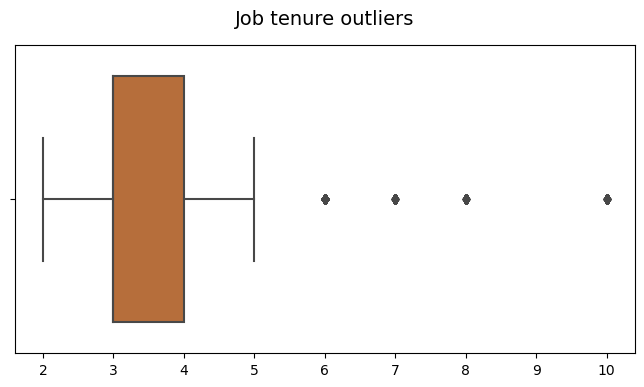

In [16]:
# Checking for any outliers in the "job_tenure" column:
plt.figure(figsize = (8,4))
sns_fig = sns.boxplot(x = df["job_tenure"], orient = "h", color = "#CB6A26")
plt.xticks(fontsize = 10)
sns_fig.set(xlabel = None)
plt.title("Job tenure outliers", fontsize = 14, pad = 15)

plt.show()

**Given the visualization, it's clear that there are a few outliers in the "job_tenure" column.**
***
**Next, we will be checking for any outliers in the 'average_monthly_hours' column.**

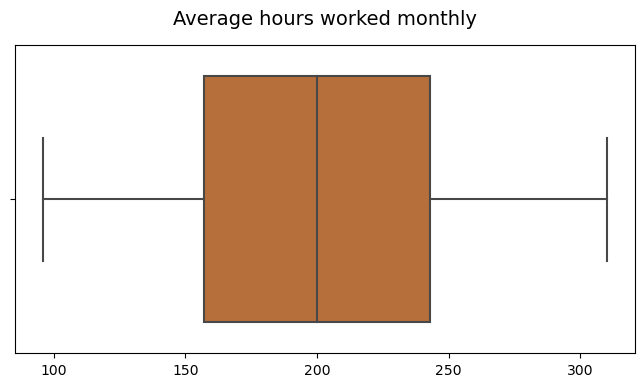

In [17]:
# Checking for any outliers in the "average_monthly_hours" column
plt.figure(figsize = (8,4))
sns_fig = sns.boxplot(x = df["average_monthly_hours"], orient = "h", color = "#CB6A26")
plt.xticks(fontsize = 10)
sns_fig.set(xlabel = None)
plt.title("Average hours worked monthly", fontsize = 14, pad = 15)

plt.show()

**Given the visualization, it's clear that there aren't any outliers in the "average_monthly_hours" column.**
***
**In this case, the outliers found eariler in the "job_tenure" column will be managed now, by trimming the extreme values which are situated beyond the interquartile range (IQR) for a more robust analysis.**

In [18]:
# Assign variables for each percentile:

# the 25th percentile value in the "job_tenure" column
perc_25 = df["job_tenure"].quantile(0.25)    
    
# the 75th percentile value in the "job_tenure" column
perc_75 = df["job_tenure"].quantile(0.75)  
    
# the interquartile range in the "job_tenure" column
iqr = perc_75 - perc_25   

In [19]:
# Defining the upper and the lower limit for non-outlier values in the "job_tenure" column.
up_limit = perc_75 + 1.5 * iqr
low_limit = perc_25 - 1.5 * iqr

In [20]:
# Identify the subset of data which contains outliers in the "job_tenure" column.
outlier_data = df[(df["job_tenure"] > up_limit) | (df["job_tenure"] < low_limit)]

In [21]:
# Print the results for the previous computations:
print("Lower limit is:", low_limit)
print("Upper limit is:", up_limit)
print("Total rows in the dataset that contain outliers in ""job tenure"" column:", len(outlier_data))

Lower limit is: 1.5
Upper limit is: 5.5
Total rows in the dataset that contain outliers in job tenure column: 824


**At this moment in the analysis, removing these outliers is not needed, but we'll keep these numbers in mind for later.**

In [22]:
# Checking the dataset again to continue the data exploration:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [23]:
# Determining how many employees stayed with the company and how many left
left_employees = df["left"].value_counts()
print(left_employees)

left
0    10000
1     1991
Name: count, dtype: int64


In [24]:
# What is the percentage of people who left vs who stayed
left_vs_stayed = df["left"].value_counts(normalize = True)
print(left_vs_stayed)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


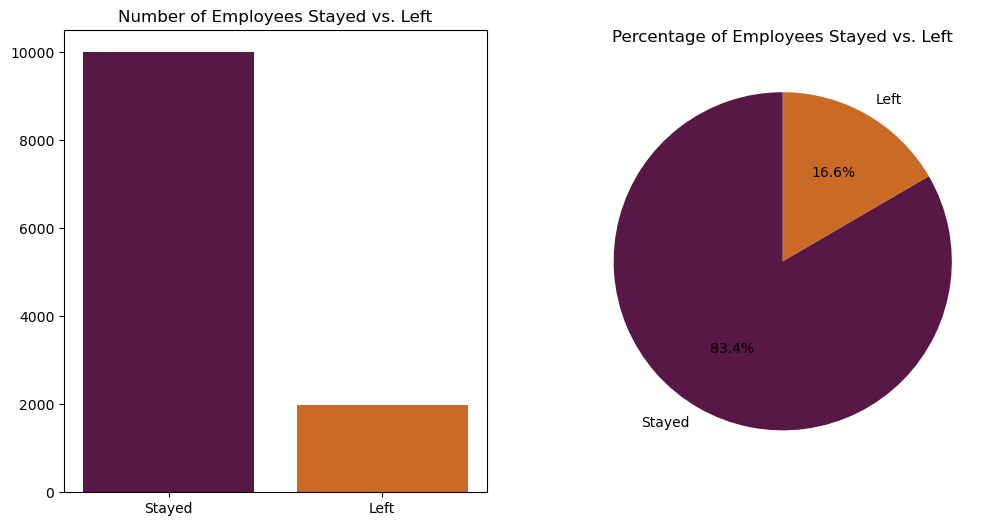

In [25]:
# Visualize these ratios:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

# Bar chart for employees who stayed and left:
ax[0].bar(left_employees.index, left_employees.values, color = ["#581845", "#CB6A26"])
ax[0].set_title("Number of Employees Stayed vs. Left")
ax[0].set_xticks(left_employees.index)
ax[0].set_xticklabels(["Stayed", "Left"])

# Pie chart for employees who stayed and left:
ax[1].pie(left_vs_stayed, labels = ["Stayed", "Left"], autopct = "%1.1f%%", colors = ["#581845", "#CB6A26"], startangle = 90)
ax[1].set_title("Percentage of Employees Stayed vs. Left")

plt.show()

#### With this information, we can now plot some visualizations for easier understanding of the data.
#### For these plots, we will use "average_monthly_hours" and "number_project" columns.

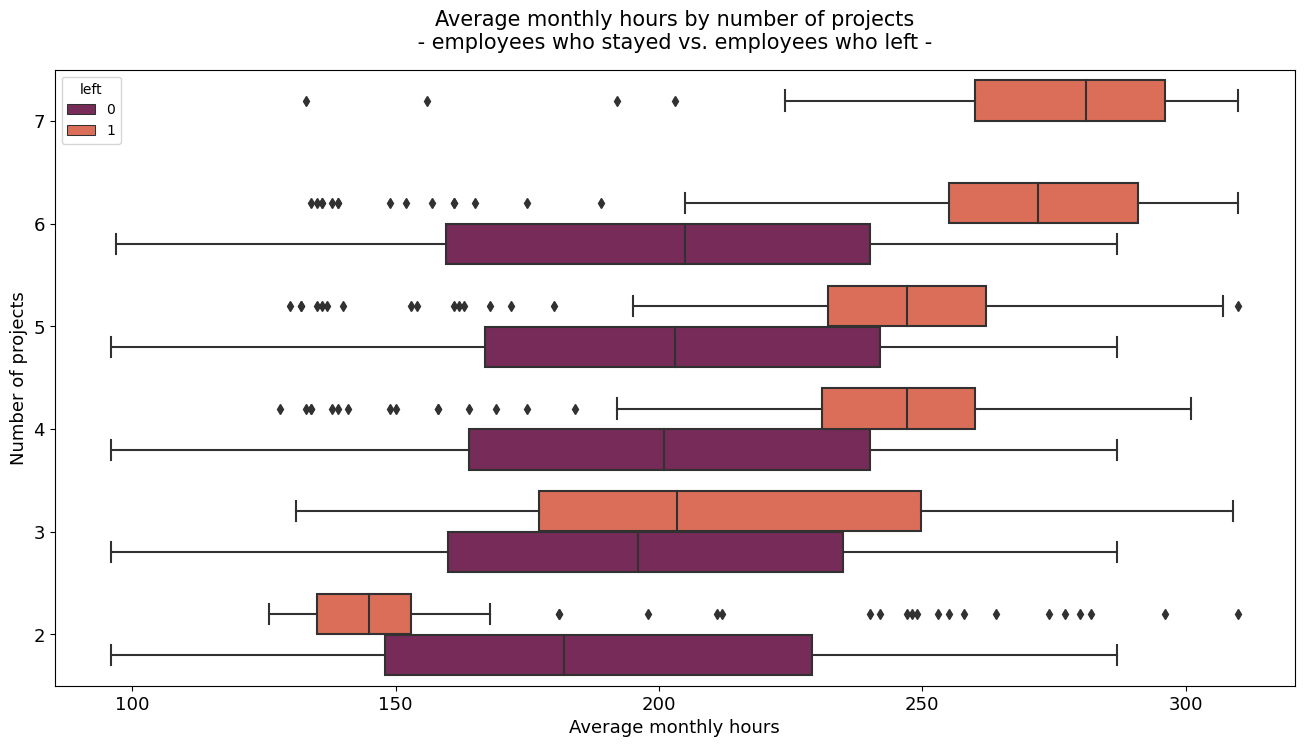

In [26]:
# Boxplot showing "average_monthly_hours" and "number_project" data, comparing employees who stayed vs. those that left:
plt.figure(figsize = (16, 8))
sns_fig = sns.boxplot(data = df, x = "average_monthly_hours", y = "number_project", hue = "left", 
                      palette = "rocket", orient = "h")
sns_fig.invert_yaxis()
sns_fig.set_xlabel(xlabel = "Average monthly hours", fontsize = 13)
sns_fig.set_ylabel(ylabel = "Number of projects", fontsize = 13)
sns_fig.tick_params(axis = "both", which = "both", labelsize = 13)
sns_fig.set_title("Average monthly hours by number of projects\n - employees who stayed vs. employees who left - ", 
                fontsize = 15, pad = 15)

plt.show()

#### Given these visualizations, the following observations can be made:
**1.** The mean of the work hours for each group increases with the number of projects worked. This indicates that employees who had more projects also worked more hours.
<br>
**2. In the "<u>employees that left</u>" group, there are several categories:**
 - The majority of those with 2 projects worked significantly fewer hours than their colleagues who didn't leave.
 - Those with 3 projects worked slightly more than their colleagues who didn't leave.
 - Those with 4 to 6 projects worked significantly more than their colleagues who didn't leave.
 - Employees that left with 7 projects, the majority of them worked the highest number of hours."

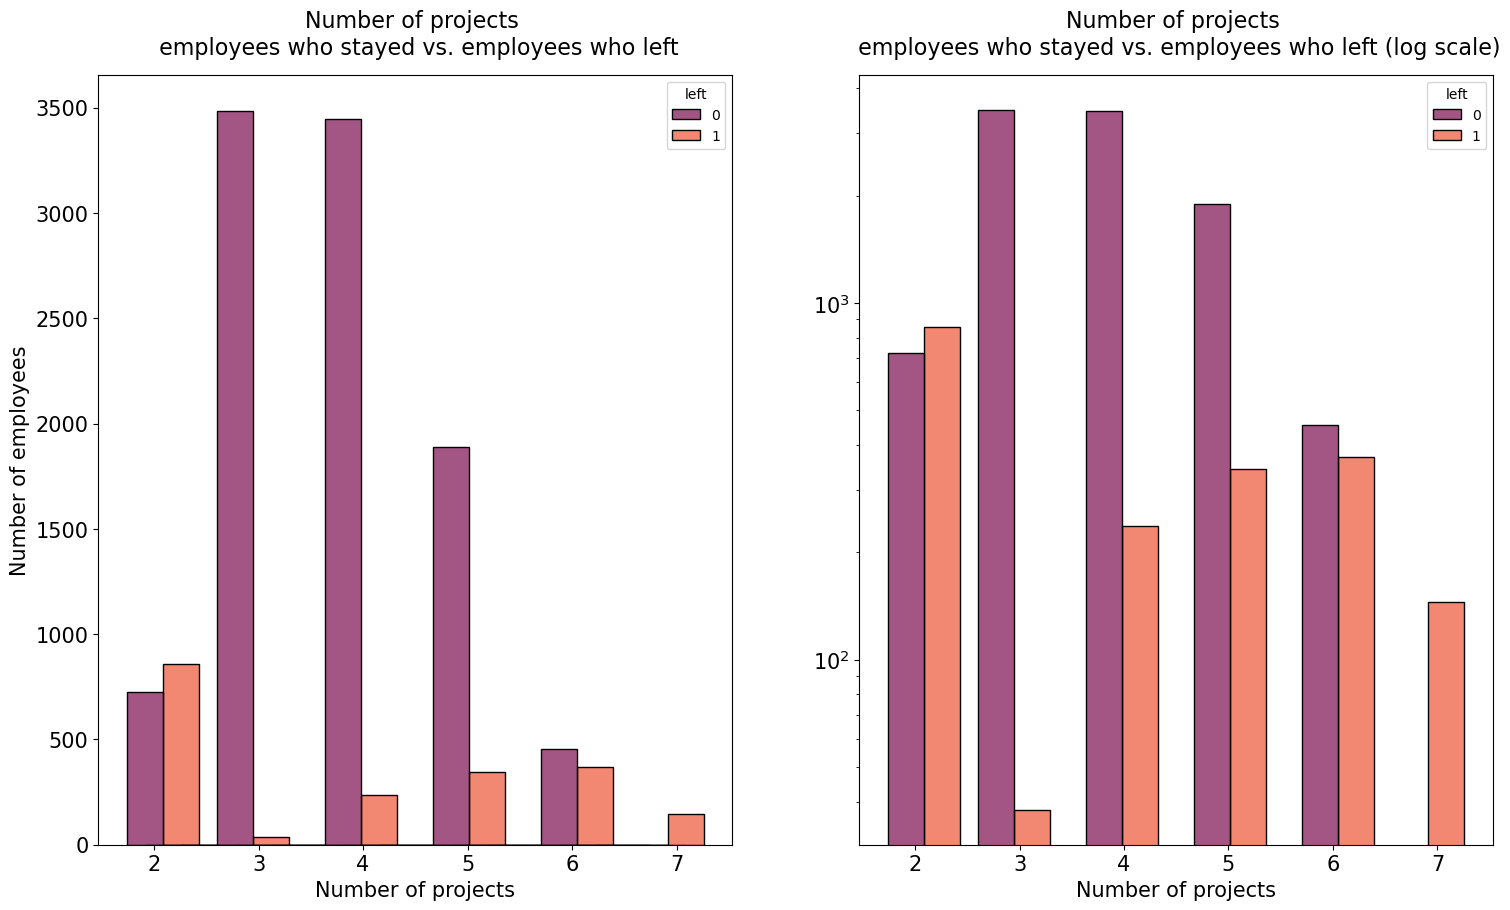

In [27]:
# Histogram showing "average_monthly_hours" and "number_project" data, comparing employees who stayed vs. those that left:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 10))

# Filtering the dataframe based on the condition of whether an employee stayed or left, representing the "number_project" column
ppl_stay = df[df["left"]==0]["number_project"]
ppl_left = df[df["left"]==1]["number_project"]

# Plotting the histogram:
sns_fig1 = sns.histplot(data = df, x = "number_project", hue = "left", palette = "rocket", 
                        multiple = "dodge", shrink = 4, ax = ax[0])
sns_fig1.set_xlabel(xlabel = "Number of projects", fontsize = 15)
sns_fig1.set_ylabel(ylabel = "Number of employees", fontsize = 15)
sns_fig1.tick_params(axis = "both", which = "both", labelsize = 15)
sns_fig1.set_title("Number of projects \n employees who stayed vs. employees who left", fontsize = 16, pad = 15)

# For better readability, we'll plot another histogram using log scale:
sns_fig2 = sns.histplot(data = df, x = "number_project", hue = "left", palette = "rocket",
                        multiple = "dodge", shrink = 4, ax = ax[1])
sns_fig2.set_xlabel(xlabel = "Number of projects", fontsize = 15)
sns_fig2.set_ylabel(None)
sns_fig2.set_yscale("log")
sns_fig2.tick_params(axis = "both", which = "both", labelsize = 15)
sns_fig2.set_title("Number of projects \n employees who stayed vs. employees who left (log scale)", fontsize = 16, pad = 15)

plt.show()

#### Given these visualizations, the following observations can be made:
**1.** As the **number of projects increases**, **employees are more likely to leave** their positions. This conclusion is validated by the fact that **every employee with 7 projects left the company.**
<br>
**2.** It seems that having 3 to 4 projects to work on simultaneously would be the optimal number for employees, considering that the ratio between those who left versus those who stayed is very small compared to the other scenarios.
<br>
**3.** These employees are overworked, based on the following:
<br>
> **1.** Normally, an employee works 40 h/week, Monday to Friday.
<br>
> **2.** During a year, that employee would work for roughly 52 weeks in total.
***
Given these 2 premises, the average "normal" hours amount that an employee works can be calculated and used as a reference.

In [28]:
# Multiply the hours/week with total number of weeks and then divide the results to 12 (months in a year)
avg_normal_h = (40 * 52) / 12

# Then round the result to 2 decimals
normal_h = round(avg_normal_h, 2)
print("Average normal hours per month:", normal_h)

Average normal hours per month: 173.33


#### Based on this value, an employee works an average of 173 hours per month.

#### Given the analysis so far, the following conclusions can be drawn:
**1.** On **every level above 2 projects per employee** => the **workers have to put a lot more hours** into their work. 
<br>
**2.** For **the employees who left and had 6 or 7 projects** groups, **the interquartile ranges for the work amounts** are placed **between <font color = red>255 - 290 hours</font>**, which is **way over the normal 173 hours/month.**


**With these insights, the next step is to check how many employees had 7 projects on their hands and whether they stayed or left the company.**

In [29]:
# Checking for employees with 7 projects:
df[df["number_project"] == 7].value_counts().sum()

145

In [30]:
# Checking how many left:
df[df["number_project"] == 7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

**This result confirms that every employee who worked on 7 projects at the same time has left the company.**

**The next step is to identify how the average hours worked per month affects the employees' satisfaction level, comparing those who stayed and those who left.**

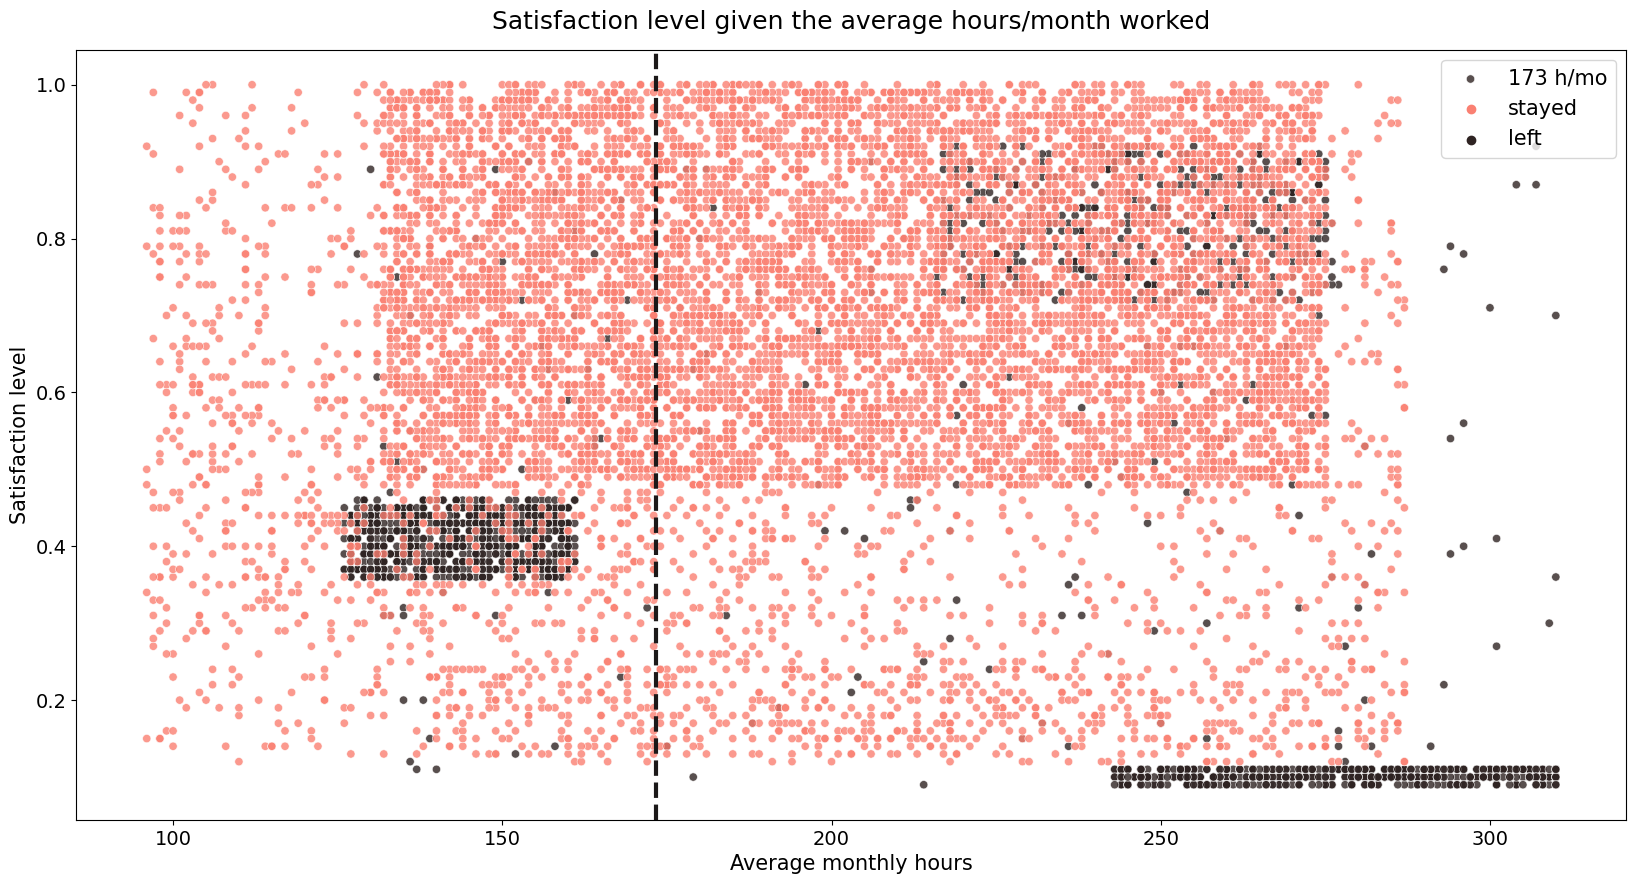

In [31]:
# Scatterplot showing the relationship between "average_monthly_hours" and "satisfaction_level"
plt.figure(figsize = (20,10))
sns_fig = sns.scatterplot(data = df, x = "average_monthly_hours", y = "satisfaction_level", 
                          hue = "left", alpha = 0.8, palette = "dark:salmon_r")
sns_fig.set_xlabel(xlabel = "Average monthly hours", fontsize = 15)
sns_fig.set_ylabel(ylabel = "Satisfaction level", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Satisfaction level given the average hours/month worked", fontsize = 18, pad = 15)
sns_fig.legend(labels = ["173 h/mo","stayed", "left"], fontsize = 15, loc = "upper right")

# Plotting a vertical line, to differntiate the data, based on our value of 173 h/month:
plt.axvline(x = normal_h, label = "173 h/mo", color = "#1C1919", linewidth = 3.0, linestyle = "--" )

plt.show()

#### From the scatterplot above, 3 groups of employees that left can be observed:

##### <u>The first group</u>
These **employees had a satisfaction level around the value of 0.4**, and a number of **working** hours **less than** the **173 h/month** calculated previously. 
<br>
In this case, the <font color = red>**satisfaction level is quite low**</font> considering the lower amount of working hours per month. From this, we may infer that other factors have contributed to their decision to leave and that their low satisfaction scores are associated with pressure exerted by their managers for more work, considering that this group has less monthly hours than the others. 

##### <u>The second group</u>
<font color = red>**These employees had a satisfaction level of 0 or close to 0**, while **working** for **240 - 310 hours per month on average**</font>. In this case, we may conclude that the **work amount** was the **main reason** for why they chose **to leave**.

##### <u>The third group</u>
<font color = green>**These employees had a satisfaction level between 0.7 and 0.9**</font>, **while working between 220 to 280 hours per month on average.** In this case, we can assume that they weren't happy about the workplace for different reasons and the high amount of monthly hours didn't play a major role in their decision to leave.

**Checking if the amount of time spent in the company had any impact on the employee's decision to leave, could provide useful information for the analysis, so for this, some more visualizations will be used.**

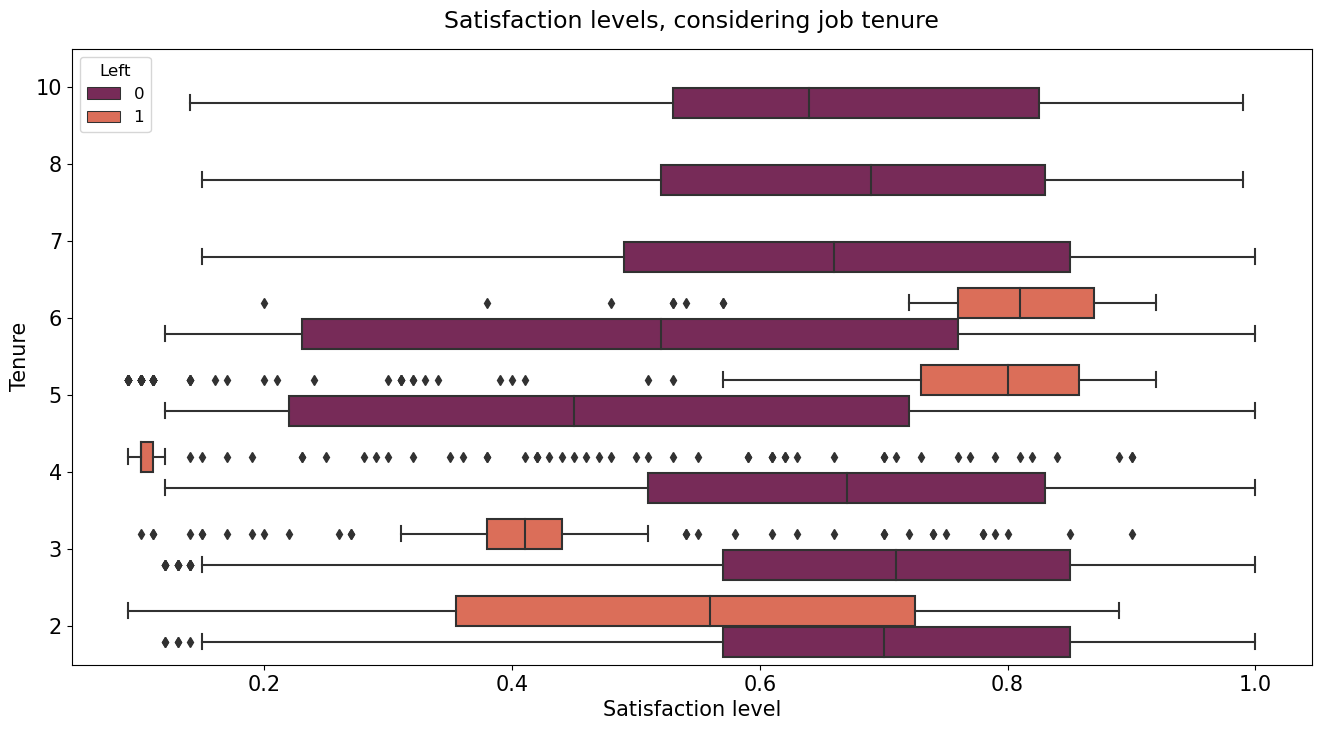

In [32]:
# Splitting the dataframes, based on whether an employee left or stayed
tenure_stay = df[df["left"]==0]["job_tenure"]
tenure_left = df[df["left"]==1]["job_tenure"]

# Setting up a boxplot
plt.figure(figsize = (16,8))

sns_box = sns.boxplot(data = df, x = "satisfaction_level", y = "job_tenure", hue = "left",
                      palette = "rocket", orient = "h")
sns_box.invert_yaxis()
sns_box.set_xlabel(xlabel = "Satisfaction level", fontsize = 15)
sns_box.set_ylabel(ylabel = "Tenure", fontsize = 15)
sns_box.tick_params(axis = "both", which = "both", labelsize = 15)
sns_box.set_title("Satisfaction levels, considering job tenure", fontsize = 17, pad = 15)
sns_box.legend(fontsize = 12, loc = "upper left", title = "Left", title_fontsize = 12)

plt.show()

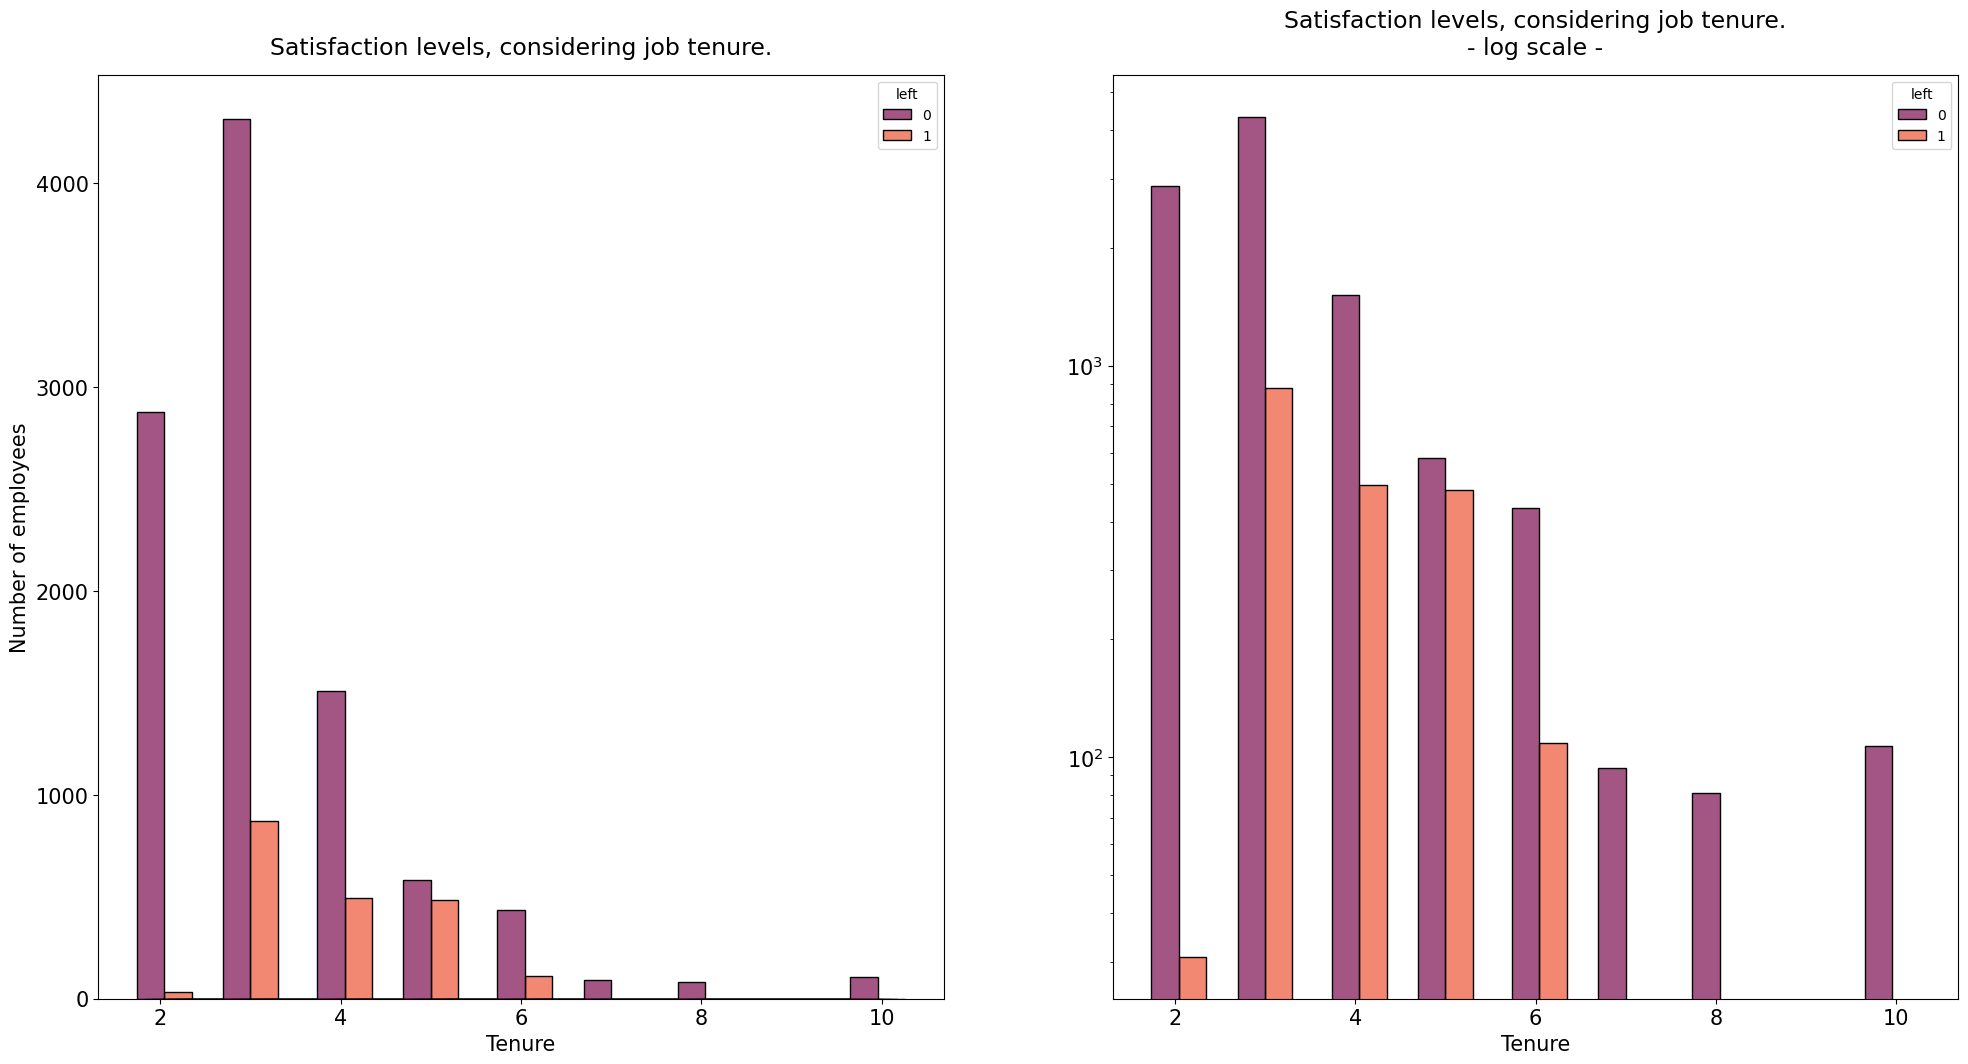

In [33]:
# Splitting the dataframes, based on whether an employee left or stayed
tenure_stay = df[df["left"]==0]["job_tenure"]
tenure_left = df[df["left"]==1]["job_tenure"]

# Setting up histograms:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 12))

sns_hist1 = sns.histplot(data = df, x = "job_tenure", hue = "left", palette = "rocket", 
                        multiple = "dodge", shrink = 7, ax = ax[0])
sns_hist1.set_xlabel(xlabel = "Tenure", fontsize = 15)
sns_hist1.set_ylabel(ylabel = "Number of employees", fontsize = 15)
sns_hist1.tick_params(axis = "both", which = "both", labelsize = 15)
sns_hist1.set_title("Satisfaction levels, considering job tenure.", fontsize = 17, pad = 15)

# For better readability, we'll plot another histogram using log scale:
sns_hist2 = sns.histplot(data = df, x = "job_tenure", hue = "left", palette = "rocket", 
                        multiple = "dodge", shrink = 7, ax = ax[1])
sns_hist2.set_yscale("log")
sns_hist2.set_xlabel(xlabel = "Tenure", fontsize = 15)
sns_hist2.set_ylabel(None)
sns_hist2.tick_params(axis = "both", which = "both", labelsize = 15)
sns_hist2.set_title("Satisfaction levels, considering job tenure.\n- log scale -", fontsize = 17, pad = 15)

plt.show()

#### Given these visualizations, the following obervations can be made:
##### <u>From the boxplot,</u> we've found that there are <u>3 groups of employees</u> that left:
**1.** **The employees with a 4 year tenure who have the lowest satisfaction scores** (<font color = red>**values around 0.1**</font>). It would be worth investigating how was this group affected in those last 4 years.
<br>
**2.** **A group** with **low to medium satisfaction levels** (**values between 0.4 and 0.7**) and **short tenure** (2-3 years)
<br>
**3.** **A group** with <font color = green>**medium to high satisfaction levels**</font> and **medium tenure**. (5-6 years)
<br>
***
Also, **the employees with longest tenure did not leave the company and their satisfaction levels allign with those of the newly employed who remained in the company.**
<br>
This might be a result of factors such as:
<br>

**1.** **Job Stability and Experience**
<br>
**2.** **Career Development Opportunities**
<br>
**3.** **Organizational Loyalty**

##### <u>The histograms</u>, confirms these findings about the long-tenured employees (working for 7 or more years in the company)
These values indicate **good satisfaction levels**, the **mean** being situated **around** the value of **7 across all 3 tenure periods (7, 8 and 10 years)**. This may be a result of these employees being higher-paid and higher-ranked in the company.

#### Further calculations of the mean and the median values of the satisfaction levels, comparing the values between the employees who left to those who stayed, could provide useful insights.

In [34]:
# Calculate mean and median satisfaction levels by employee status
mean_satisfaction = df.groupby(["left"])["satisfaction_level"].agg(np.mean)
median_satisfaction = df.groupby(["left"])["satisfaction_level"].agg(np.median)

print("Mean satisfaction: ", mean_satisfaction)
print("========================================")
print("Median satisfaction: ", median_satisfaction)

Mean satisfaction:  left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64
Median satisfaction:  left
0    0.69
1    0.41
Name: satisfaction_level, dtype: float64


In [35]:
# Combine mean and median data for plotting
combined_data = pd.concat([mean_satisfaction, median_satisfaction], axis = 1)
combined_data.columns = ["Mean Satisfaction", "Median Satisfaction"]

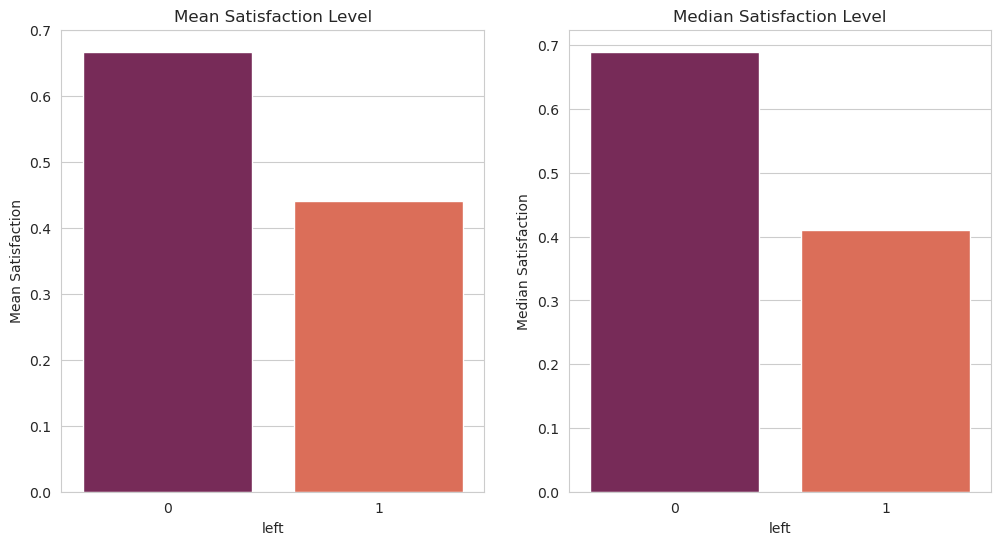

In [36]:
# Set the style with a cleaner grid for only the current plot
with sns.axes_style("whitegrid"):
    # Create a comparison barchart for each metric
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

    # Bar plot for Mean Satisfaction
    sns.barplot(x = mean_satisfaction.index, y = mean_satisfaction.values, ax = ax[0], palette = "rocket")
    ax[0].set_title("Mean Satisfaction Level")
    ax[0].set_ylabel("Mean Satisfaction")

    # Bar plot for Median Satisfaction
    sns.barplot(x = median_satisfaction.index, y = median_satisfaction.values, ax = ax[1], palette = "rocket")
    ax[1].set_title("Median Satisfaction Level")
    ax[1].set_ylabel("Median Satisfaction")

# Display the plot
plt.show()

### Interpreting the results of the mean and median satisfaction levels by employee status (stayed or left) provides insights into the central tendency of satisfaction within each group. As a result, the following observations can be made:

**Mean Satisfaction:**
<br>
**Employees Who Stayed (left = 0):** 
 -  The mean satisfaction level for employees who stayed with the company is **0.67**. **On average**, these employees have a relatively high satisfaction level.
<br>

**Employees Who Left (left = 1):**
 -  The mean satisfaction level for employees who left the company is 0.**44**. On average, these employees have a lower satisfaction level compared to those who stayed.
 
**Median Satisfaction:**
<br>
**Employees Who Stayed (left = 0)**
 -  The median satisfaction level for employees who stayed is **0.69**. This suggests that the middle value of satisfaction is relatively high.
<br>

**Employees Who Left (left = 1):** 
 -  The median satisfaction level for employees who left is **0.41**. The median is lower, indicating that at least 50% of the employees who left had satisfaction levels below this value.

These results validate the previous findings regarding satisfaction levels among the employees who left and those who stayed.
**Comparing the two sets**, it's clear that <u>**the mean and the median scores are lower for the employees who left**</u>.

#### Next step in the analysis is identifying how is the salary affected by an employee's time in the company.

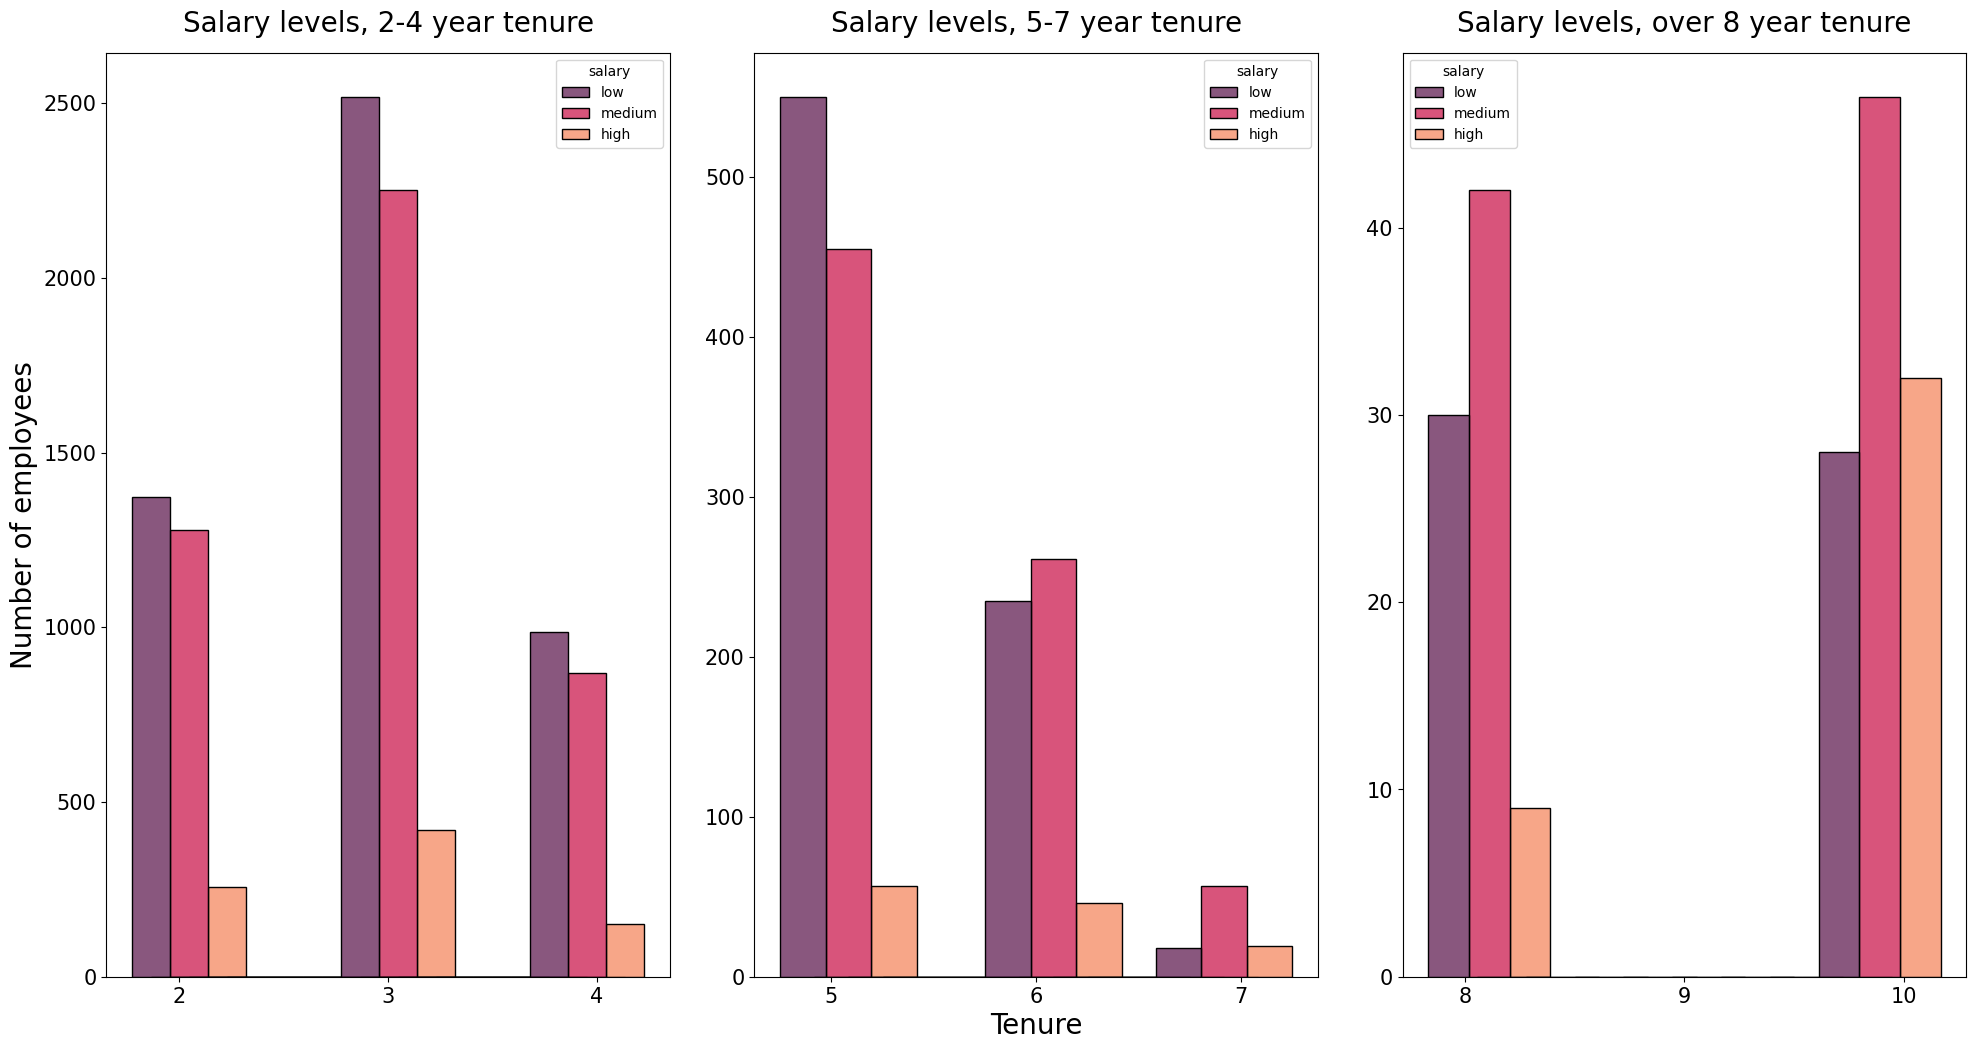

In [37]:
# Defining the variables for different tenure periods:
short_tenure = df[df["job_tenure"].between(2, 4, inclusive = "both")]
medium_tenure = df[df["job_tenure"].between(5, 7, inclusive = "both")]
long_tenure = df[df["job_tenure"] >= 8]

# Next, plot the comparison between these 3 tenure levels, using histograms:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (24,12), gridspec_kw = {"wspace": 0.15})

# Histogram no. 1
sns_hist1 = sns.histplot(data = short_tenure, x = "job_tenure", hue = "salary", hue_order = ["low", "medium", "high"],
                         multiple = "dodge", palette = "rocket", shrink = 6, ax = ax[0])
sns_hist1.set_xlabel(xlabel = None)
sns_hist1.set_ylabel(ylabel = "Number of employees", fontsize = 20)
sns_hist1.tick_params(axis = "both", which = "both", labelsize = 15)
plt.sca(ax[0])  
plt.xticks(range(2, 5))  
sns_hist1.set_title("Salary levels, 2-4 year tenure", fontsize = 20, pad = 15)

# Histogram no. 2
sns_hist2 = sns.histplot(data = medium_tenure, x = "job_tenure", hue = "salary", hue_order = ["low", "medium", "high"],
                         multiple = "dodge", palette = "rocket", shrink = 4, ax = ax[1])
sns_hist2.set_xlabel(xlabel = "Tenure", fontsize = 20)
sns_hist2.set_ylabel(ylabel = None)
sns_hist2.tick_params(axis = "both", which = "both", labelsize = 15)
plt.sca(ax[1])  
plt.xticks(range(5, 8))  
sns_hist2.set_title("Salary levels, 5-7 year tenure", fontsize = 20, pad = 15)

# Histogram no. 3
sns_hist3 = sns.histplot(data = long_tenure, x = "job_tenure", hue = "salary", hue_order = ["low", "medium", "high"],
                         multiple = "dodge", palette = "rocket",shrink = 2.5, ax = ax[2])
sns_hist3.set_xlabel(xlabel = None)
sns_hist3.set_ylabel(ylabel = None)
sns_hist3.tick_params(axis = "both", which = "both", labelsize = 15)
plt.sca(ax[2])  
plt.xticks(range(8, 11))
sns_hist3.set_title("Salary levels, over 8 year tenure", fontsize = 20, pad = 15)

plt.show()

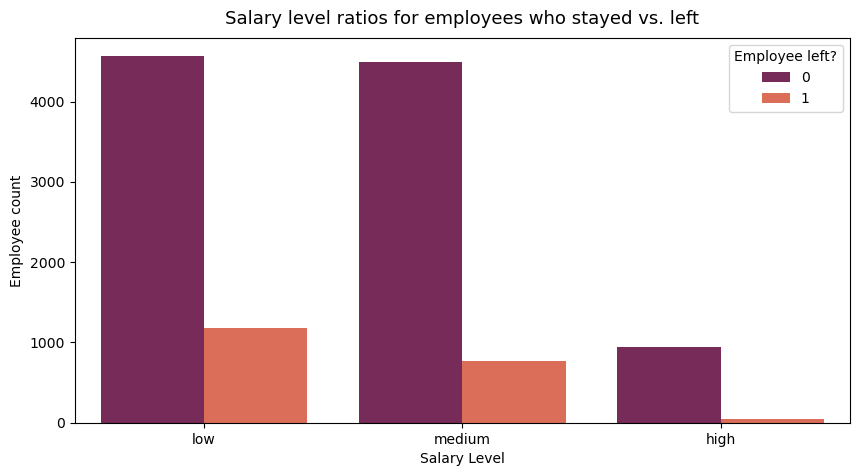

In [38]:
# Creating a countplot to check whether the salary amount had any influence over an employee's decision to leave.:
plt.figure(figsize = (10,5))
sns_fig = sns.countplot(data = df, x = "salary", hue = "left", palette = "rocket")
sns_fig.set_xlabel(xlabel = "Salary Level")
sns_fig.set_ylabel(ylabel = "Employee count")
sns_fig.tick_params(axis = "both", which = "both", labelsize = 10)
sns_fig.set_title("Salary level ratios for employees who stayed vs. left", fontsize = 13, pad = 10)
sns_fig.legend(title = "Employee left?", title_fontsize = 10)

plt.show()

#### These plots show that long-tenured employees were not disproportionately comprised of higher-paid employees

#### Another thing to look for, is the existence of any correlation between working hours per month and evaluation scores.

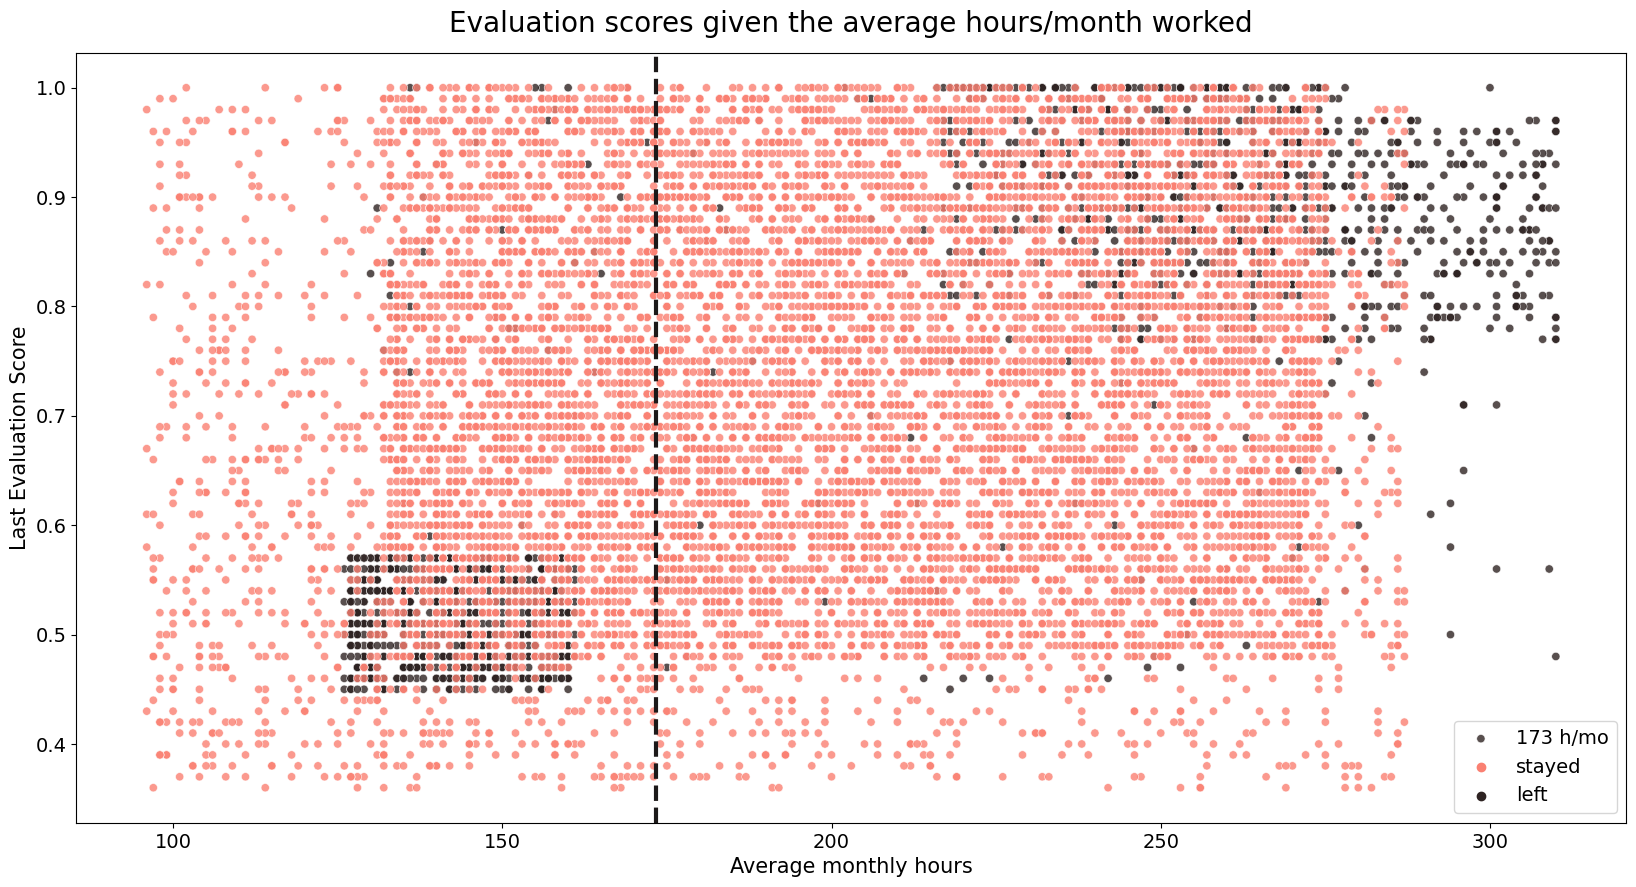

In [39]:
# Create a scatterplot
plt.figure(figsize = (20,10))
sns_scatter = sns.scatterplot(data = df, x = "average_monthly_hours", y = "last_evaluation", hue = "left",
                             palette = "dark:salmon_r", alpha = 0.8)
sns_scatter.set_xlabel(xlabel = "Average monthly hours", fontsize = 15)
sns_scatter.set_ylabel(ylabel = "Last Evaluation Score", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Evaluation scores given the average hours/month worked", fontsize = 20, pad = 15)

# Plotting a vertical line, to differntiate the data, based on our value of 173 h/month:
plt.axvline(x = normal_h, label = "173 h/mo", color = "#1C1919", linewidth = 3.0, linestyle = "--" )

sns_scatter.legend(labels = ["173 h/mo","stayed", "left"], fontsize = 14, loc = "lower right")

plt.show()

#### Given the above visualization, the following observations can be made: 
**1.** **<u>There are 2 groups of employees who left</u>**:
<br>
* **A group who was overworked** (a range between 220 and 310 hours) **and very good evaluation scores**, <font color = green>**between 0.77 and 1**</font>.
 <br>
- **A group who worked for less than** the "normal" amount of **173 h/mo.** **and lower evaluation scores**, ranging **between 0.45 and 0.57**.
***
From these findings, a conclusion can be made that there is a correlation between these two variables. **The company's managers rated employees higher as they worked more**.
***
#### It is also clear that the majority of the employees work a lot more than normal every month, given how the data is divided on the scatterplot. 

#### This conclusion can be validated using some more information, based on calculations done on the "average_monthly_hours" column.

In [40]:
# First, select only the employees who work for more than 173 hours per month:
overworked_emp = df[df["average_monthly_hours"] > normal_h].value_counts().sum()
overworked_emp

7763

In [41]:
# Next, assign the whole dataframe to a variable:
df_avg_hours = df["average_monthly_hours"].value_counts().sum()
df_avg_hours

11991

In [42]:
# Now find the percentage of employees who work for more than 173 hours per month:
result_ratio = (overworked_emp / df_avg_hours) * 100
result_ratio

64.74022183304145

**This result clearly shows that over 64% of this company's employees are overworked, based on our normal amount of workload scenario.**

#### Continuing the analysis, next step is to check whether an employee's decision to leave was influenced by other factors.
***
 -  First, check if an employee left the company due to work-related accidents:

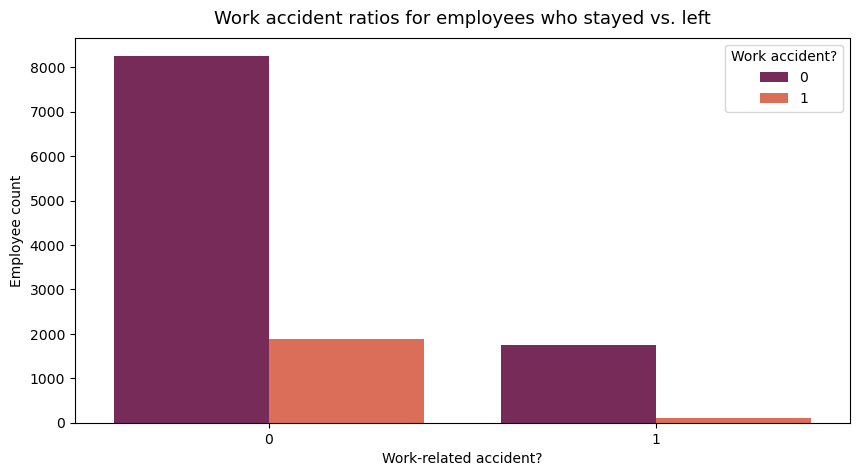

In [43]:
# Creating a countplot:

plt.figure(figsize = (10,5))
sns_fig = sns.countplot(data = df, x = "work_accident", hue = "left", palette = "rocket")
sns_fig.set_xlabel(xlabel = "Work-related accident?")
sns_fig.set_ylabel(ylabel = "Employee count")
sns_fig.tick_params(axis = "both", which = "both", labelsize = 10)
sns_fig.set_title("Work accident ratios for employees who stayed vs. left", fontsize = 13, pad = 10)
sns_fig.legend(title = "Work accident?", title_fontsize = 10)

plt.show()

**From this visualization, it appears that having a work accident was not a determining factor for leaving the company.**

 -  Next, check whether an employee is promoted or not has any effect on his decision to leave.

To start off, some quick calculations need to be done in order to see what's the percentage of workers who got promoted, considering the employees who left and those who stayed.

In [44]:
# Check all the values and their distribution:
df["promotion_last_5years"].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

Results show that <font color = red>**only 203 employees**</font> **were promoted in the past 5 years**.

In [45]:
# Split the results into separate variables:
df_promo = df[df["promotion_last_5years"] == 1]
df_no_promo = df[df["promotion_last_5years"] == 0]

Now, check for both groups to see how many employees were promoted in this time period.

In [46]:
# Employees who were promoted and stayed:
df_promo_s_perc = (len(df_promo[df_promo['left'] == 0])/df_promo.shape[0])*100
round(df_promo_s_perc, 2)

96.06

In [47]:
# Employees who were promoted and left:
df_promo_l_perc = (len(df_promo[df_promo['left'] == 1])/df_promo.shape[0])*100
round(df_promo_l_perc, 2)

3.94

In [48]:
# Employees who were not promoted and stayed:
df_no_promo_s_perc = (len(df_no_promo[df_no_promo["left"] == 0])/df_no_promo.shape[0])*100
round(df_no_promo_s_perc, 2)

83.18

In [49]:
# Employees who were not promoted and left:
df_no_promo_l_perc = (len(df_no_promo[df_no_promo["left"] == 1])/df_no_promo.shape[0])*100
round(df_no_promo_l_perc, 2)

16.82

In [50]:
# Results summary:
print("The percentage of employees who were promoted and stayed is:", round(df_promo_s_perc, 2))
print("The percentage of employees who were promoted and left is:", round(df_promo_l_perc, 2))
print("The percentage of employees who were not promoted and stayed is:", round(df_no_promo_s_perc, 2))
print("The percentage of employees who were not promoted and left is:", round(df_no_promo_l_perc, 2))

The percentage of employees who were promoted and stayed is: 96.06
The percentage of employees who were promoted and left is: 3.94
The percentage of employees who were not promoted and stayed is: 83.18
The percentage of employees who were not promoted and left is: 16.82


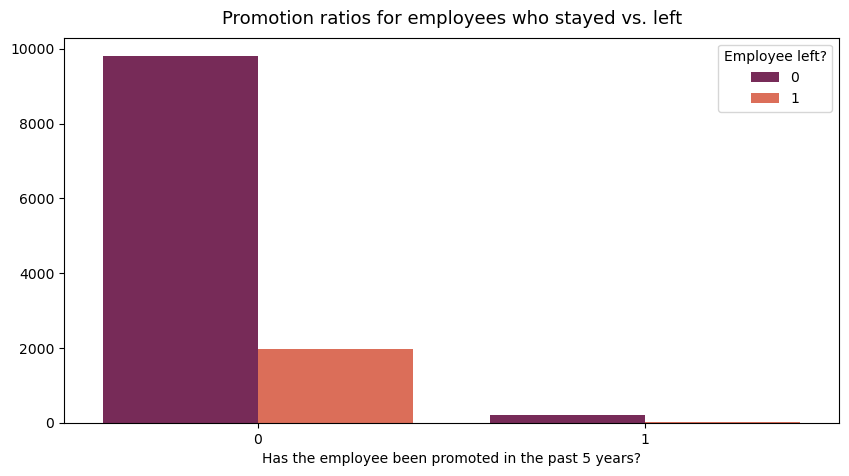

In [51]:
# Creating a countplot:

plt.figure(figsize = (10,5))
sns_fig = sns.countplot(data = df, x = 'promotion_last_5years', hue = "left", palette = "rocket")
sns_fig.set_xlabel(xlabel = "Has the employee been promoted in the past 5 years?")
sns_fig.set_ylabel(ylabel = None)
sns_fig.tick_params(axis = "both", which = "both", labelsize = 10)
sns_fig.set_title("Promotion ratios for employees who stayed vs. left", fontsize = 13, pad = 10)
sns_fig.legend(title = "Employee left?", title_fontsize = 10)

plt.show()

**A summary of the results of previous calculations**:
<br>
**1.** Employees who were **<font color=green>promoted</font> and <font color=green>stayed</font>: 96.06%**
<br>
**2.** Employees who were **<font color=green>promoted</font> and <font color=red>left</font>: 3.94%**
<br>
**3.** Employees who were **<font color=red>not promoted</font> and <font color=green>stayed</font>: 83.18%**
<br>
**4.** Employees who were **<font color=red>not promoted</font> and <font color=red>left</font>: 16.82%**

From this visualization and previous calculations, it is clear that **the vast majority of the employees who left have not been promoted**. In this case, <u>**we can conclude that not being promoted was a determining factor these employees regarding their decision to leave**</u>.


#### The next thing is checking if being a part of a particular department had any influence over an employee's decision to leave the company.

In [52]:
# Check the departments and their employee count:
df["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

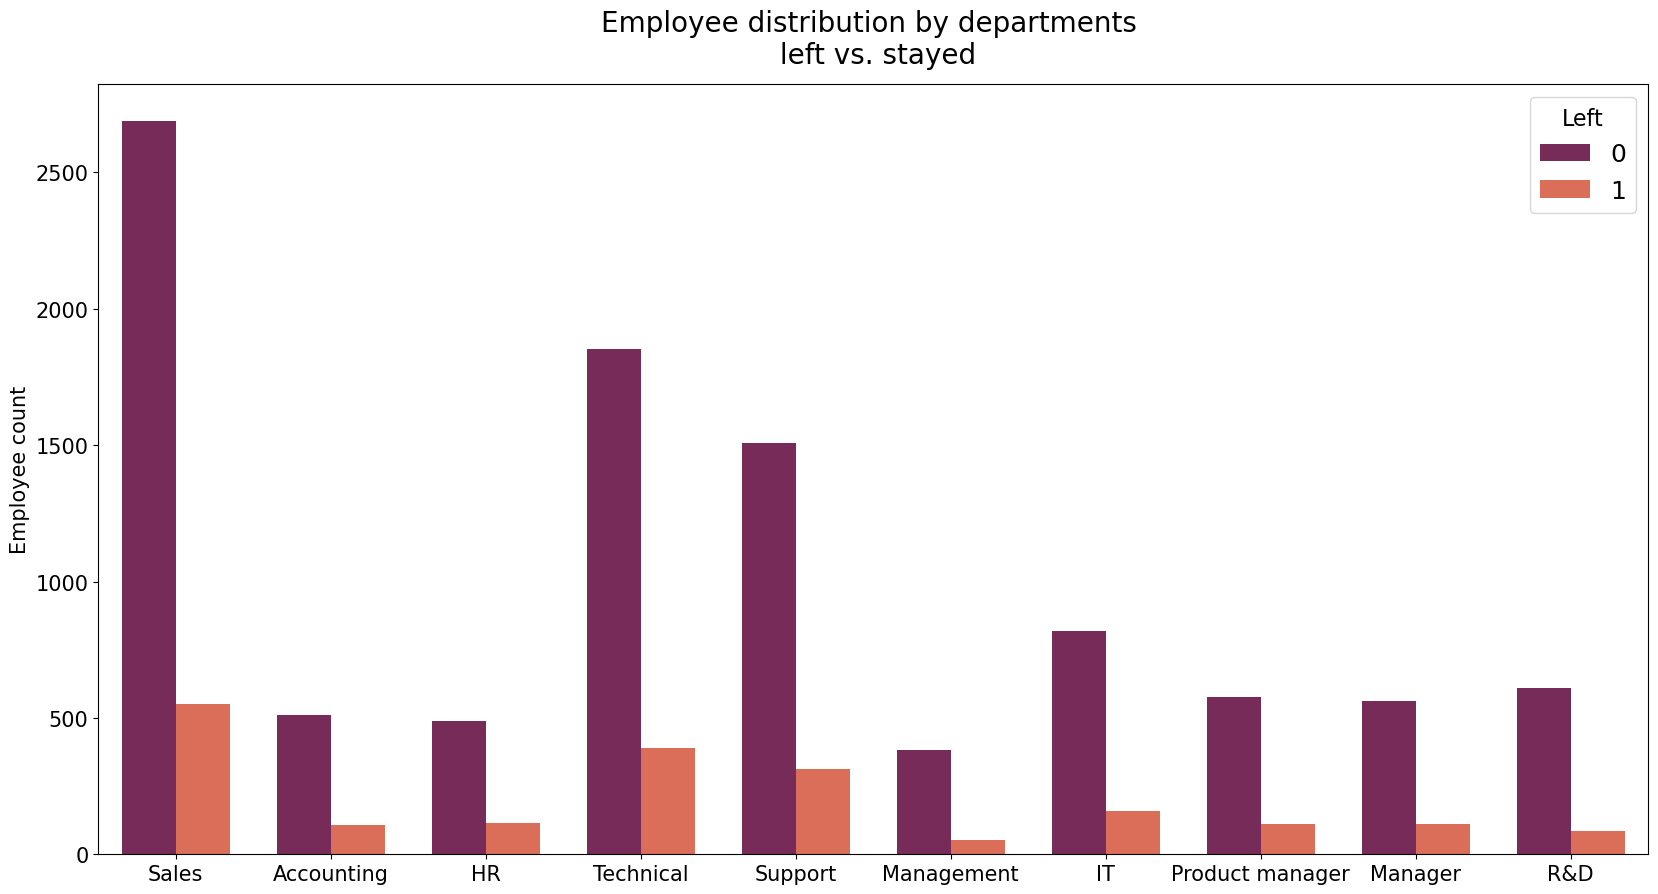

In [53]:
# Defining a list variable for our y-axis, for better readability:
departments = ["Sales", "Accounting", "HR", "Technical", "Support", "Management", "IT", "Product manager", "Manager", "R&D"]

# Creating the countplot for visualizing the results:
plt.figure(figsize = (20, 10))
sns_plot = sns.countplot(data = df, x = "department", hue = "left", palette = "rocket", width = 0.7)

sns_plot.set_xlabel(xlabel = None)
sns_plot.set_ylabel(ylabel = "Employee count", fontsize = 15)
sns_plot.set_xticks(range(len(departments)))
sns_plot.set_xticklabels(departments, fontsize = 15)
sns_plot.tick_params(axis = "both", which = "both", labelsize = 15)
sns_plot.set_title("Employee distribution by departments \n left vs. stayed", fontsize = 20, pad = 15)

# Manually set the legend outside the plot and increase the title font size
handles, labels = sns_plot.get_legend_handles_labels()
legend = plt.legend(handles, labels, title = "Left", fontsize = 18, bbox_to_anchor = (1, 1))
legend.get_title().set_fontsize("16")

plt.show()

From this plot, we observe that **working in a particular department did not play a major role in the employee's decision to leave**, seeing that there is no department that differs significantly in its "left vs. stayed" employee proportion.


#### Another thing to look for is the existence of strong correlations between the variables in the dataset, using a heatmap.

Text(0.5, 1.0, 'Data correlation heatmap')

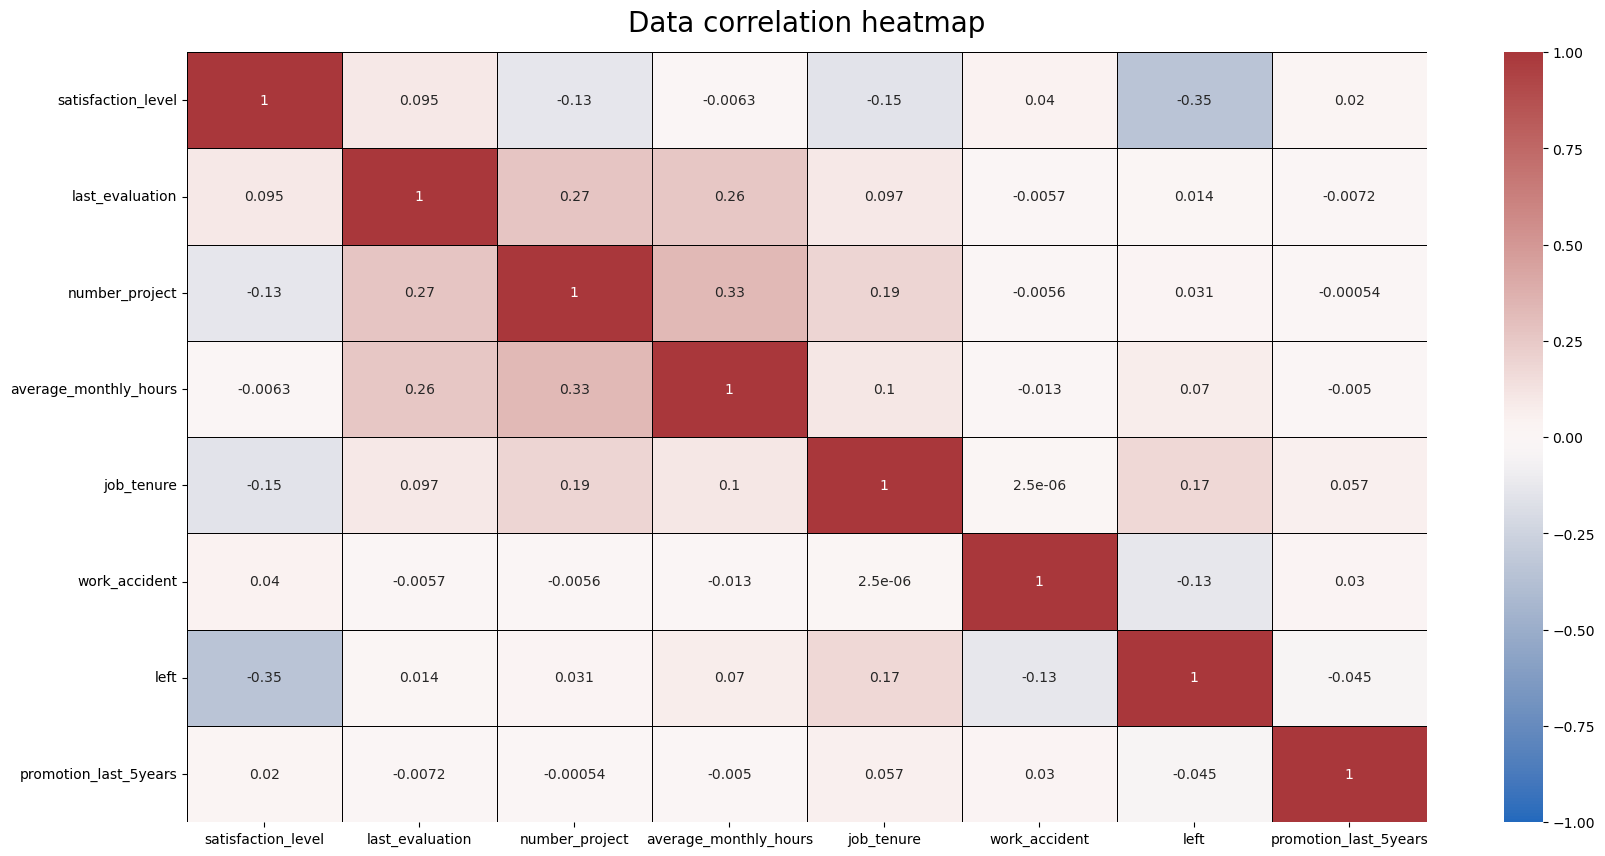

In [54]:
# Extracting the desired numerical values for the input:
num_df = df.select_dtypes(include=["float64", "int64"])

# Creating the heatmap:
plt.figure(figsize = (20,10))
sns_heatmap = sns.heatmap(data = num_df.corr(), vmin = -1, vmax = 1, annot = True, 
                          cmap = sns.color_palette("vlag", as_cmap=True),linecolor = 'black', linewidths = 0.5, 
                          fmt=".2g",  xticklabels = True, yticklabels = True)
sns_heatmap.set_title("Data correlation heatmap", fontsize = 20, pad = 15)

From this heatmap we can observe that there is a **positive correlation between how many projects an employee has, how many hours he works in a month and what's his satisfaction level**.
<br>
We can also observe that **an employee's decision to leave is negatively correlated with their satisfacion level**.

#### Given our entire analysis so far, it appears that employees decide to leave the company because of the following reasons:
**1.** <font color = red>**They were overworked**</font>.
- Earlier, we've found that **over 64% of the employees were working over the normal montlhy rate of 173 h**.
<br>
<br>
- We've concluded that these **employees had too many projects to work on at the same time**. This conclusion is validated by the fact that every employee who had more than 2 projects at the same time, had to work for more than the normal monthly rate. We've also found out that **the group which had 6 or 7 projects** on their hands, **had to put between <font color = red>250 - 290 hours</font> of work**, as a monthly average.
<br>

**2.** <font color = red>**They had low satisfaction levels**</font>.
<br>
<br>
Previously, we've split the employees who left into 3 groups, based on their satisfaction levels:
<br>

<u>**The first group**</u>

 - **employees with a satisfaction level around 0.4** who worked less than the normal monthy rate.
<br>
For this case, we assumed these employees were pressured by their managers to work more.
<br>

<u>**The second group**</u>
 - **employees with a satisfaction level of 0 or close to 0** who **worked for 240 - 310 hours per month on average**</font>. 
<br>
For this case, we may conclude that work amount was the main reason for why they left.
<br>

<u>**The third group**</u>
<br>
 - **employees with satisfaction levels between 0.7 and 0.9** who **worked for 220 - 280 hours per month** on average.
For this case, we can assume that they left due diferent reasons, such as to personal motives, going for better paid jobs or moving to another place to live.


**3.** <font color = red>**They are not financially incentivized to stay.**</font>
<br>
 - Previously, we found that **out of the 11.991 employees, only 203 of them were promoted in the past 5 years**. Also, looking at the salary levels, we've seen that there are few "high" salaries for employees with a tenure of 6 years or less. After this point, there is a slight increase, for 7 year-tenured employees, but it drops again for 8 year-tenured ones.
 - Finally, we see that "high" salary amounts start to increase after a tenure of 10 years.

#### For the next part in this analysis, we will try to construct some models that predict whether an employee is likely to leave the company, based on different factors. 
Considering that the output we're looking for is "yes" or "no", which translates into the boolean values of 1 (True, an employee would leave) and 0 (False, an employee would not leave), the models will be based on binary classification. 
<br>
With the goal set, **since the prediction variable is categorical, there are two options**:
 - **Logistic Regression model**
 - **Tree-based model**

Only one of these 2 machine learning models could achieve the goal for the task, but given this dataset, it might be a good idea to implement both of them and compare their performances in order to see which provides more accurate predictions.

**First to be implemented will be the Logistic Regression model.**
***
For this, the dataset needs to contain only numeric values since non-numerical features (categorical and text data) can't be processed by machine learning models.

In [55]:
# Looking at the dataset:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


It seems our dataset contains 2 columns with non-numerical features: "department" and "salary":

In [56]:
# Showing values inside "department" column:
df["department"].value_counts().index

Index(['sales', 'technical', 'support', 'IT', 'RandD', 'product_mng',
       'marketing', 'accounting', 'hr', 'management'],
      dtype='object', name='department')

In [57]:
# Showing values inside "salary" column:
df["salary"].value_counts().index

Index(['low', 'medium', 'high'], dtype='object', name='salary')

In order to deal with these non-numerical values, pandas' get_dummies() function for converting categorical variable(s) into dummy/indicator variables.
<br>
- The "department" column can be converted into dummy variables in order to use it for modeling
- For "salary", even though it contains categorical variables,a hierarchy exists in this column, going from low to high. In this case, it would be better to convert the levels into numbers: 1 for low, 2 for medium, 3 for high.

In [58]:
# Make a copy of it for our modeling needs, in order to keep the original dataframe
df_to_model = df.copy()

# Checking the output of our copied dataframe:
df_to_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### In order to deal with these non-numerical values, we can convert them using the get_dummies() function in pandas. 
For the "department" column this will work very well, but for the "salary" column we see that, even though it contains categorical variables, a hierarchy exists, going from low to high. For these, it would be better to convert the salary levels into numbers: 1 for low, 2 for medium, 3 for high, using Categorical.codes in pandas.

In [59]:
# Encoding the "salary" column, using pandas:
df_to_model["salary"] = (df_to_model["salary"].astype("category").cat.set_categories(["low", "medium", "high"])).cat.codes + 1

# Encoding the "department" column:
df_to_model = pd.get_dummies(data = df_to_model, columns = ["department"], drop_first = False).astype(float)

# Show the dataframe:
df_to_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


With the dataframe encoded, the Logistic Regression model can be implemented, but there is one more thing to adress before that. Given the previous analysis, we've found that in the "job_tenure" column there are some outliers which were not removed at the time.
<br>
Considering that **the presence of extreme outliers may somehow affect the performance of the model and lowering the performance**, it would be a good idea to just drop them, before starting to predict.

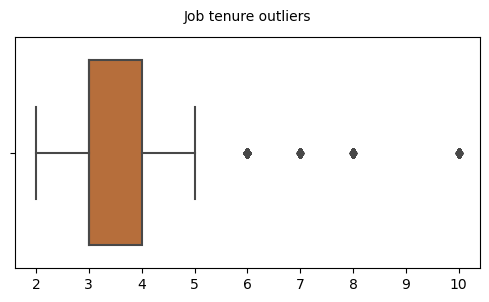

In [60]:
# Quickly plot a visualization to see the outliers again:
plt.figure(figsize = (6,3))
plt.title("Job tenure outliers", fontsize = 10, pad = 12)
plt.xticks(fontsize = 10, labels = None)
plt.yticks(fontsize = 10)
sns_fig = sns.boxplot(x = df["job_tenure"], orient = "h", color = "#CB6A26")
sns_fig.set(xlabel = None)

plt.show()

In [61]:
# Check the limits for the values:
print("Lower limit is:", low_limit)
print("Upper limit is:", up_limit)

Lower limit is: 1.5
Upper limit is: 5.5


In [62]:
# Set up a new dataframe, by removing "job_tenure" outliers:
df_log_reg_model = df_to_model[(df_to_model["job_tenure"] >= low_limit) & (df_to_model["job_tenure"] <= up_limit)]

In [63]:
# Previous dataframe:
print("With the outliers:", len(df_to_model.value_counts()))

# New dataframe:
print("Without the outliers:", len(df_log_reg_model.value_counts()))

With the outliers: 11991
Without the outliers: 11167


#### The next step is to isolate the outcome variable that will be used for predicting.

In [64]:
# Isolate the outcome variable:
y = df_log_reg_model["left"]
y.head()

0    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: left, dtype: float64

#### Next, we need to select all the other variables which will help us predict the outcome "left".

In [65]:
# Select the features:
X = df_log_reg_model.drop(["left"], axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2.0,153.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**For better model accuracy, it is good practice to split the data into 2 categories**:
- **one subset** will be used **for training** the model 
- the **other subset** will be used **for testing** the model 
<br>

To do this, the train_test_split function from the scikitlearn library, which splits arrays or matrices into random train and test subsets.

In [66]:
# Assign the variables:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

### Now we can construct and test our logistic regression model:

In [67]:
# Construct the model and fit it in a training dataset, using the previous results:
log_model = LogisticRegression(random_state = 42, max_iter = 1000).fit(X_train, y_train)

In [68]:
# Test it, using the other values resulted from the train_test_split function:
model_predicted = log_model.predict(X_test)

<a id="Logistic_regression_CM"></a>

#### For easier understanding of the results, a confusion matrix can be plotted:

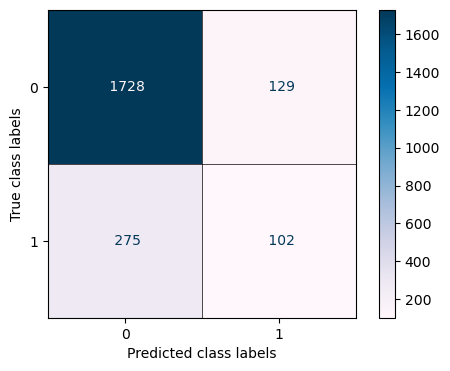

In [69]:
# Create the arrays for the matrix:
log_cm = confusion_matrix(y_test, model_predicted)
log_cm_display = ConfusionMatrixDisplay(confusion_matrix = log_cm)

# Plotting the matrix:
fig, ax = plt.subplots(figsize = (6, 4))
log_cm_display.plot(values_format=" ", cmap = "PuBu", ax = ax)

# Adding some delimiting lines
ax.axhline(y = 0.5, color = "k", linestyle = "-", linewidth = 0.5)
ax.axvline(x = 0.5, color = "k", linestyle = "-", linewidth = 0.5)

ax.set_xlabel("Predicted class labels")
ax.set_ylabel("True class labels")

plt.show()

Link to [Random Forest no. 1 CM](#rf_cm)

**In this confusion matrix, the results are split as follows:**
1. **True negatives** are displayed in the **top-left square**:
<br>1728 employees didn't leave and the model predicted accurately as staying
<br>
<br>
2. **False positives** are displayed in the **top-right square**:
<br>129 employees didn't leave, but the model inaccurately predicted as leaving
<br>
<br>
3. **False negatives** are displayed in the **bottom-left square**:
<br>275 employees left, but the model inaccurately predicted as staying
<br>
<br>
4. **True positives** are displayed in the **bottom-right square**:
<br>102 employees left and the model predicted accurately as leaving
***
**Given these results, we can conclude that this model is more prone to making errors by falsely identifying instances as negative when they are actually positive**.
<br>
Having more false negatives than positives means that the model is missing or failing to identify instances of the positive class more frequently than it is incorrectly predicting positive outcomes. This might indicate that the model is not capturing all the positive instances and is missing opportunities for correct predictions.

**In order to evaluate the performance of our logistic regression model, a classification report will be created, containing the following metrics:**
- precision
- recall
- f1-score
- accuracy
<br>

Another thing that needs to be checked is for the class balance in the data, for the "left" column in our dataframe. This class balance check will help with a more accurate interpretation of the metrics listed above.

In [70]:
# Checking the ratios in our data:
df_log_reg_model["left"].value_counts(normalize = True)

left
0.0    0.831468
1.0    0.168532
Name: proportion, dtype: float64

**From this result it's clear that the data is split approximately into 83% (employees who stayed) and 17% (employees who left)**.
<br>
Even if this imbalance exists in the dataset, it is not that high to require resampling of our analysis. Resampling is usually needed when the minority class (in this case: the employees who left) constitutes less than 5-10% of the total dataset.
<br>
Therefore, we can proceed with our reporting.

In [71]:
# Creating the classification report for the Logistic regression model:
labels = ["Predicted employees would not leave", "Predicted employees whould leave"]
class_report = classification_report(y_test, model_predicted, target_names = labels)
print(class_report)

                                     precision    recall  f1-score   support

Predicted employees would not leave       0.86      0.93      0.90      1857
   Predicted employees whould leave       0.44      0.27      0.34       377

                           accuracy                           0.82      2234
                          macro avg       0.65      0.60      0.62      2234
                       weighted avg       0.79      0.82      0.80      2234



**This report shows that the weighted averages for our model metrics were: precision of 79%, recall of 82%, f1-score of 80% and accuracy of 72%.**
<br>
These average scores are not bad, but **if our main focus is predicting employees who would leave, then the scores would be much lower than the averages.** 
***
**In that situation, this Logistic regression model would not be good enough for the task.**

Given the performance of the Logistic regression model, next a Tree-based model will be implemented.

In [72]:
# Use the same "df_to_model" dataframe for this model:
y = df_to_model["left"]
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: left, dtype: float64

In [73]:
X = df_to_model.drop(["left"], axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
# Assign the variables:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [75]:
# Instantiate the decision tree
dec_tree_base = DecisionTreeClassifier(random_state = 0)

# Assign the hyperparameters for the search:
params = {"max_depth": [4, 6, 8, None],
          "min_samples_leaf": [2, 5, 1],
          "min_samples_split": [2, 4, 6]
         }

# Assign the scoring measures to be captured:
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
tree_base = GridSearchCV(estimator = dec_tree_base, param_grid = params, scoring = scores, cv = 4, refit = "roc_auc")

**With our model set, we now need fit it to the training data:**

In [76]:
%%time
tree_base.fit(X_train, y_train)

CPU times: total: 3.62 s
Wall time: 3.64 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [77]:
# Checking for best parameters:
tree_base.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [78]:
# Checking the best AUC score on CV:
tree_base.best_score_

0.9710911037253271

In [79]:
# Create another decision tree model using the best parameters resulted from the cross-validation:
# Instantiate the decision tree
dec_tree = DecisionTreeClassifier(random_state = 0)

# Assign the hyperparameters for the search:
params = {"max_depth": [4],
          "min_samples_leaf": [2],
          "min_samples_split": [2]
         }

# Assign the scoring measures to be captured:
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
tree = GridSearchCV(estimator = dec_tree, param_grid = params, scoring = scores, cv = 4, refit = "roc_auc")

In [80]:
%%time
tree.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 97.8 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4], 'min_samples_leaf': [2],
                         'min_samples_split': [2]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

**Given this score, the model is expected to have a very good performance in predicting whether an employee would leave or not.**

In [81]:
# Create a function that extracts the results from the cross validation process
def get_results(model_name: str, model_object, metric: str):
    """
    Function's arguments:
    model_name (str): Name of the table that is called in the output
    model_object: GridSearchCv object
    metric (str): auc, accuracy, precision, recall or f1-score
    """

    # Mapping the input metrics to the names in the GridSearchCV, using a dictionary:
    metrics = {"auc" : "mean_test_roc_auc",
               "accuracy" : "mean_test_accuracy",
               "precision" : "mean_test_precision",
               "recall" : "mean_test_recall",
               "f1-score" : "mean_test_f1"    
              }

    # Extract the results from the CV and put them into a dataframe:
    df_cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the newly created dataframe with the MAX metric score:
    best_results = df_cv_results.iloc[df_cv_results[metrics[metric]].idxmax(), :]

    # Extract the metrics we're interested in from that resulted row:
    auc = best_results.mean_test_roc_auc
    accuracy = best_results.mean_test_accuracy
    precision = best_results.mean_test_precision
    recall = best_results.mean_test_recall
    f1 = best_results.mean_test_f1

    # Place the results in a table, for better uderstanding:
    table = pd.DataFrame({"Model" : [model_name],
                          "AUC" : [auc],
                          "Accuracy" : [accuracy],
                          "Precision" : [precision],
                          "Recall" : [recall],
                          "F1-score" : [f1]                    
                        })
    return table

In [82]:
# Create a function that extracts  all the scores from a model's prediction set
def get_scores(model_name: str, model, X_test_data, y_test_data):
    """
    Function arguments:
    model_name (str): How the model is named in the output section
    model: A fit GridSearchCV object
    X_test_data: numpy array of X_test data
    y_test_data: numpy array of y_test data
    """
    
    # Assign the best estimator score to a variable
    predict = model.best_estimator_.predict(X_test_data)
    
    # Extract the metrics we're interested in from the model:
    auc = roc_auc_score(y_test_data, predict)
    accuracy = accuracy_score(y_test_data, predict)
    precision = precision_score(y_test_data, predict)
    recall = recall_score(y_test_data, predict)
    f1 = f1_score(y_test_data, predict)
    
    # Place the results in a table, for better uderstanding:
    table = pd.DataFrame({"Model" : [model_name],
                          "AUC" : [auc],
                          "Accuracy" : [accuracy],
                          "Precision" : [precision],
                          "Recall" : [recall],
                          "F1-score" : [f1]                    
                        })
    return table

In [83]:
# Extract all the CV results:
tree_cv_results = get_results("Decision Tree cross-validation", tree, "auc")

In [84]:
# Extract all the model's best estimator prediction scores:
tree_scores = get_scores("Decision Tree scores", tree, X_test, y_test)

In [85]:
# Placing both results into a dataframe for better reference:
tree_summary = pd.concat([tree_cv_results, tree_scores], axis = 0, ignore_index = True)

# Show the dataframe:
tree_summary

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree cross-validation,0.971091,0.974145,0.926282,0.917764,0.921857
1,Decision Tree scores,0.950033,0.975406,0.937984,0.912060,0.924841


**From these metrics, it can be observed that the validation scores are similar to the test scores. In this case, the model should be able to provide good and accurate predictions.** 

**When working with Decision Trees, it is good to keep in mind that these models are vulnerable to overfitting.**
<br>
Overfitting is a common issue in machine learning where a model learns the training data too well, capturing noise or random fluctuations in the data rather than the underlying patterns. 
<br>
An overfit model performs well on the training data but fails to generalize to new, unseen data. Essentially, it memorizes the training set instead of learning the true relationship between features and the target variable.

**Key characteristics of overfitting include**:

**High Training Accuracy, Poor Test Accuracy**:<br>
The model achieves high accuracy on the training data, but when evaluated on a separate test set (unseen data), its performance is significantly lower.

**Capturing Noise**:<br>
The model captures noise, outliers, or random fluctuations in the training data as if they were genuine patterns.

**Complexity**:<br>
Overfit models tend to be overly complex, with too many parameters or features relative to the amount of training data. This complexity allows the model to fit the training data closely, but it may not generalize well to new data.

**High Variance**:<br>
Overfit models have high variance, meaning that small changes in the training data can lead to significant changes in the model.
***
**To address this potential problem, we can use a random forest model instead, which is an ensemble learning method that builds multiple decision trees during training and combines their predictions during testing.**

In [86]:
# Instantiate the model:
random_forest_base = RandomForestClassifier(random_state = 0)

# Assign the hyperparameters we want to search for:
params = {"max_depth" : [3, 5, None],
          "max_features" : [1.0],
          "max_samples" : [0.7, 1.0],
          "min_samples_leaf" : [1, 2, 3],
          "min_samples_split" : [2, 3, 4],
          "n_estimators" : [300, 500]
         }

# Assign the scoring measures we want to capture:
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
rf_base = GridSearchCV(estimator = random_forest_base, param_grid = params, scoring = scores, cv = 4, refit = "roc_auc")

In [87]:
# %%time
# rf_base.fit(X_train, y_train)

Training a random forest machine learning model can take a lot of time, especially when working with large datasets. In order to avoid retraining the model everytime we run the code, it's a good idea to save it on a file and load it whenever it's needed for analysis.
<br>
One easy way to do this, is using python's "pickle" module.

In [88]:
# Define a path to save the model:
path = "" # Saves the models in a local jupyter notebook folder

In [89]:
# Next, create 2 functions that write and read the pickle file:

# Writing the pickle:
def pickle_write (path, model_object, save_as: str):
    """
    path: where the pickle will be saved
    model_object: a model you want to pickle
    save_as: the manner in which the model is saved
    """
    
    with open (path + save_as + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)
        
# Reading the pickle:
def pickle_read(path, saved_model: str):
    """
    path: the path to read from
    saved_model: filename of the model to read in
    """
    
    with open(path + saved_model + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
    
    return model   


In [90]:
# # Save the the pickle locally
# pickle_write(path, rf_base, "rf_base_model")

**The model is now saved and can be loaded whenever needed, without having to retrain the model after each run of code.**

In [91]:
# Read and load the pickle
rf_base = pickle_read(path, "rf_base_model")

In [92]:
# Checking for best parameters:
rf_base.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [93]:
# Checking for the best AUC score:
rf_base.best_score_

0.9793947236268321

In [94]:
# Create another random forest model using the best parameters resulted from the cross-validation:
# Instantiating the model:
random_forest = RandomForestClassifier(random_state = 0)

# Assign the hyperparameters we want to search for:
params = {"max_depth" : [5],
          "max_features" : [1.0],
          "max_samples" : [0.7],
          "min_samples_leaf" : [2],
          "min_samples_split" : [2],
          "n_estimators" : [300]
         }

# Assign the scoring measures we want to capture:
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
rf = GridSearchCV(estimator = random_forest, param_grid = params, scoring = scores, cv = 4, refit = "roc_auc")

In [95]:
# %%time
# rf.fit(X_train, y_train)

In [96]:
# # Save the the pickle locally
# pickle_write(path, rf, "rf_model")

In [97]:
# Read and load the pickle
rf = pickle_read(path, "rf_model")

**Proceed with the analysis:**

In [98]:
# Extract all the CV results:
rf_cv_results = get_results("Random Forest cross-validation", rf, "auc")

In [99]:
# Extract all the model's best estimator prediction scores:
rf_scores = get_scores("Random Forest scores", rf, X_test, y_test)

In [100]:
# Placing both results into a dataframe for better reference:
rf_summary = pd.concat([rf_cv_results, rf_scores], axis = 0, ignore_index = True)

# Show the dataframe:
rf_summary

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Random Forest cross-validation,0.979395,0.977690,0.949339,0.914625,0.931569
1,Random Forest scores,0.954545,0.979575,0.958005,0.917085,0.937099


**Again, same observation can be made, that the validation scores are similar to the test scores. As a result, this model should be able to provide good and accurate predictions aswell.**

The performance of the Decision Tree model can also be compared to that of the Random Forest model:

In [101]:
# Creating a comparison dataframe with the results:
summary_results_1 = pd.concat([tree_cv_results, rf_cv_results], axis = 0, ignore_index = True)
summary_results_1

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree cross-validation,0.971091,0.974145,0.926282,0.917764,0.921857
1,Random Forest cross-validation,0.979395,0.977690,0.949339,0.914625,0.931569


In [102]:
# Creating a comparison dataframe with the scores:
summary_scores_1 = pd.concat([tree_scores, rf_scores], axis = 0, ignore_index = True)
summary_scores_1

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree scores,0.950033,0.975406,0.937984,0.912060,0.924841
1,Random Forest scores,0.954545,0.979575,0.958005,0.917085,0.937099


Here we can see that the **Random Forest** model has **better cross-validation scores** and **better scores overall**, which means **it outperforms the Decision Tree model.**
<br>
Given these results, the proceeding analysis will be using the Random Forest Model.

#### For easier understanding of the results, a confusion matrix can be plotted:

<a id="rf_cm"></a>
<a id="rf2_cm"></a>

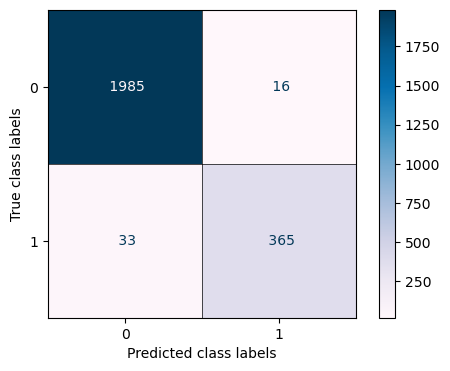

In [103]:
# Create the arrays for the matrix:
predict = rf.best_estimator_.predict(X_test)
c_matrix = confusion_matrix(y_test, predict)

# Plotting the matrix:
matrix_fig = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
fig, ax = plt.subplots(figsize=(6, 4))
matrix_fig.plot(values_format=" ", cmap="PuBu", ax=ax)

# Adding some delimiting lines
ax.axhline(y = 0.5, color = "k", linestyle = '-', linewidth = 0.5)
ax.axvline(x = 0.5, color = "k", linestyle = '-', linewidth = 0.5)

ax.set_xlabel("Predicted class labels")
ax.set_ylabel("True class labels")

plt.show()

Link to [Logistic Regression CM](#Logistic_regression_CM).
<br>
Link to [Random Forest no. 2 CM](#rf2_cm2).


**In this confusion matrix, the results are split as follows:**
1. **True negatives** are displayed in the **top-left square**:
<br>1985 employees didn't leave and the model predicted accurately as staying
<br>
<br>
2. **False positives** are displayed in the **top-right square**:
<br>16 employees didn't leave, but the model inaccurately predicted as leaving
<br>
<br>
3. **False negatives** are displayed in the **bottom-left square**:
<br>33 employees left, but the model inaccurately predicted as staying
<br>
<br>
4. **True positives** are displayed in the **bottom-right square**:
<br>365 employees left and the model predicted accurately as leaving
<br>

**Given these results, we observe that the model can still make a few errors by falsely identifying instances as negative when they are actually positive**. Considering there are few false positive and false negative results, we can conclude that our model is reliable.

***
**Comparing these results to those from the Logistic Regression model, it is clear that the Random Forest model is performing much better, providing a lot less false positive and false negative predictions.**

**While using any Machine Learning models, we need to be aware of any presence of data leakage**, which appears when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the model being constructed.
<br>
<br>
**It is likely that some of the data might not be suited for use in the training dataset, because of the following reasons**:
<br>
1. **Satisfaction levels might not be accurately reported by the employees**, due to personal bias towards the company.
<br>
2. **The average hours worked per month reported might not indicate a fair representation of the actual work amount required by the company**, since these numbers may be affected by factors such as:
 - an employee finding out he will be fired by the managers, therefore working less.
 - en employee's decision to quit the job, therefore working less.
 - an employee's improper training and insufficient knowledge in terms of approaching one or more projects, therefore having to work more.
***
Because of these potential inaccuracies, it might be better to adjust the dataset before fitting it into the training model.
<br>
Given the assumptions listed above, for the next set of predictions some feature engineering would make the dataset more suitable for analysis. For that, the "satisfaction_level" column will be dropped and the"average_monthly_hours" will be replaced with another column, showing if an employee is overworked or not, using boolean values.

In [104]:
# Dropping "satisfaction_level" column from our model's dataframe:
df_modified = df_to_model.drop("satisfaction_level", axis = 1)

# Show the new dataframe:
df_modified.head()

,last_evaluation,number_project,average_monthly_hours,job_tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2.0,157.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.86,5.0,262.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.88,7.0,272.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.87,5.0,223.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.52,2.0,159.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
# Create the "overworked" column and place it after the "average_monthly_hours" column:
overworked = df_modified["average_monthly_hours"]
df_modified.insert(loc = 3, column = "overworked", value = overworked)

In [106]:
# And show the new dataframe:
df_modified.head()

,last_evaluation,number_project,average_monthly_hours,overworked,job_tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2.0,157.0,157.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.86,5.0,262.0,262.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.88,7.0,272.0,272.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.87,5.0,223.0,223.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.52,2.0,159.0,159.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [107]:
# Inspect the minimum and maximum values of the newly created column:
max_h = df_modified["overworked"].max()
min_h = df_modified["overworked"].min()

# And show the results:
print("Maximum hours value is:", max_h)
print("Minimum hours value is:", min_h)

Maximum hours value is: 310.0
Minimum hours value is: 96.0


From previous calculations, the assumption is that an employee normally works for 8 hours/day, 5 days/week and 52 weeks per year.
<br>
That means approximately 173.33 hours worked per month on average.
<br>
It is valid to assume that any employee who works for more than 173.33 h/month is considered overworked. For the analysis, the rounded value will be used: 173 h/month.

In [108]:
# Convert the data present in the "overworked" column into boolean values:
df_modified["overworked"] = (df_modified["overworked"] > 173).astype(int)

In [109]:
df_modified.head()

,last_evaluation,number_project,average_monthly_hours,overworked,job_tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2.0,157.0,0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.86,5.0,262.0,1,6.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.88,7.0,272.0,1,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.87,5.0,223.0,1,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.52,2.0,159.0,0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [110]:
# Drop the "average_monthly_hours" column:
df2_to_model = df_modified.drop("average_monthly_hours", axis = 1)

# Show the changes made:
df2_to_model.head()

,last_evaluation,number_project,overworked,job_tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2.0,0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.86,5.0,1,6.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.88,7.0,1,4.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.87,5.0,1,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.52,2.0,0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Proceeding with the modeling:

In [111]:
# Isolate the outcome variable:
y = df2_to_model["left"]

# Select the features:
X = df2_to_model.drop("left", axis = 1)

In [112]:
# Next, we split the data for training and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 0)

**Same as previously, a Decision Tree model and a Random Forest model will be implemented, and the best performing one will be used for predicting.**
***
First, set up the Decision tree model, based on the new dataset.

In [113]:
# Instantiating the model:
dec_tree2_base = DecisionTreeClassifier(random_state = 0)

# Assign the hyperparameters for the search:
params2 = {"max_depth": [4, 6, 8, None],
          "min_samples_leaf": [2, 5, 1],
          "min_samples_split": [2, 4, 6]
          }

# Assign the scoring measures we want to capture:
scores2 = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
tree2_base = GridSearchCV(estimator = dec_tree2_base, param_grid = params2, scoring = scores2, cv = 4, refit = "roc_auc")

In [114]:
%%time
tree2_base.fit(X_train, y_train)

CPU times: total: 3.02 s
Wall time: 3.06 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [115]:
# Checking for best parameters:
tree2_base.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [116]:
# And best AUC score on CV
tree2_base.best_score_

0.9592901532863556

In [117]:
# Create another decision tree model using the best parameters resulted from the cross-validation:
# Instantiating the model:
dec_tree2 = DecisionTreeClassifier(random_state = 0)

# Assign the hyperparameters for the search:
params2 = {"max_depth": [6],
          "min_samples_leaf": [1],
          "min_samples_split": [6]
          }

# Assign the scoring measures we want to capture:
scores2 = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
tree2 = GridSearchCV(estimator = dec_tree2, param_grid = params2, scoring = scores2, cv = 4, refit = "roc_auc")

In [118]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 82 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [6], 'min_samples_leaf': [1],
                         'min_samples_split': [6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [119]:
# Extract all the CV results:
tree2_cv_results = get_results("Decision Tree no. 2 cross-validation", tree2, "auc")

In [120]:
# Extract all the model's best estimator prediction scores:
tree2_scores = get_scores("Decision Tree no. 2 scores", tree2, X_test, y_test)

In [121]:
# Placing both results into a dataframe for better reference:
tree2_summary = pd.concat([tree2_cv_results, tree2_scores], axis = 0, ignore_index = True)

# Show the dataframe:
tree2_summary

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree no. 2 cross-validation,0.95929,0.951418,0.823127,0.902711,0.860618
1,Decision Tree no. 2 scores,0.92980,0.939975,0.767932,0.914573,0.834862


**After the changes made to the dataset, these results show that the validation scores are similar to the test scores. The largest difference can be seen on the "Precision" metric. Even so, the model is expected to give good and accurate predictions.**

In [122]:
# Creating a comparison dataframe with the results:
trees_compared_results = pd.concat([tree_cv_results, tree2_cv_results], axis = 0, ignore_index = True)
trees_compared_results

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree cross-validation,0.971091,0.974145,0.926282,0.917764,0.921857
1,Decision Tree no. 2 cross-validation,0.959290,0.951418,0.823127,0.902711,0.860618


In [123]:
# Creating a comparison dataframe with the scores:
trees_compared_scores = pd.concat([tree_scores, tree2_scores], axis = 0, ignore_index = True)
trees_compared_scores

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree scores,0.950033,0.975406,0.937984,0.912060,0.924841
1,Decision Tree no. 2 scores,0.929800,0.939975,0.767932,0.914573,0.834862


These results show that some of the scores dropped when compared to the first tree model. This outcome was expected since there were fewer features to be taken into consideration by the model.
<br>
**Even so, the second Decision Tree model performs really well, considering the new dataset.**

Next, set up the Random Forest Model, based on the new dataset.

In [124]:
# Instantiating the model:
random_forest2_base = RandomForestClassifier(random_state = 0)

# Assign the hyperparameters we want to search for:
params = {"max_depth" : [3, 5, None],
          "max_features" : [1.0],
          "max_samples" : [0.7, 1.0],
          "min_samples_leaf" : [1, 2, 3],
          "min_samples_split" : [2, 3, 4],
          "n_estimators" : [300, 500]
         }

# Assign the scoring measures we want to capture:
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
rf2_base = GridSearchCV(estimator = random_forest2_base, param_grid = params, scoring = scores, cv = 4, refit = "roc_auc")

In [125]:
# %%time
# rf2_base.fit(X_train, y_train)

In [126]:
# # Save the the pickle locally
# pickle_write(path, rf2_base, "rf2_base_model")

In [127]:
# Read and load the pickle
rf2_base = pickle_read(path, "rf2_base_model")

In [128]:
# Checking for best parameters:
rf2_base.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [129]:
# Checking for best AUC score:
rf2_base.best_score_

0.9641923966449872

In [130]:
# Create another random forest model using the best parameters resulted from the cross-validation:
# Instantiating the model:
random_forest = RandomForestClassifier(random_state = 0)

# Assign the hyperparameters we want to search for:
params = {"max_depth" : [5],
          "max_features" : [1.0],
          "max_samples" : [0.7],
          "min_samples_leaf" : [2],
          "min_samples_split" : [2],
          "n_estimators" : [500]
         }

# Assign the scoring measures we want to capture:
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"] 

# Start the grid search:
rf2 = GridSearchCV(estimator = random_forest, param_grid = params, scoring = scores, cv = 4, refit = "roc_auc")

In [131]:
# %%time
# rf2.fit(X_train, y_train)

In [132]:
# # Save the the pickle locally
# pickle_write(path, rf2, "rf2_model")

In [133]:
# Read and load the pickle
rf2 = pickle_read(path, "rf2_model")

In [134]:
# Extract all the CV results:
rf2_cv_results = get_results("Random Forest no. 2 cross-validation", rf2, "auc")

In [135]:
# Extract all the model's best estimator prediction scores:
rf2_scores = get_scores("Random Forest no. 2 scores", rf2, X_test, y_test)

In [136]:
# Placing both results into a dataframe for better reference:
rf2_summary = pd.concat([rf2_cv_results, rf2_scores], axis = 0, ignore_index = True)

# Show the dataframe:
rf2_summary

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Random Forest no. 2 cross-validation,0.964192,0.959237,0.860047,0.901442,0.880221
1,Random Forest no. 2 scores,0.937019,0.958733,0.855107,0.904523,0.879121


**This model aswell has validation scores similar to the test scores. The largest difference can be seen on the "AUC" score. Even so, we can expect good and accurate predictions from this model.**

In [137]:
# Creating a comparison dataframe with the results:
rf_compared_results = pd.concat([rf_cv_results, rf2_cv_results], axis = 0, ignore_index = True)
rf_compared_results

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Random Forest cross-validation,0.979395,0.977690,0.949339,0.914625,0.931569
1,Random Forest no. 2 cross-validation,0.964192,0.959237,0.860047,0.901442,0.880221


In [138]:
# Creating a comparison dataframe with the scores:
rf_compared_scores = pd.concat([rf_scores, rf2_scores], axis = 0, ignore_index = True)
rf_compared_scores

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Random Forest scores,0.954545,0.979575,0.958005,0.917085,0.937099
1,Random Forest no. 2 scores,0.937019,0.958733,0.855107,0.904523,0.879121


Again, see that some drops in scores when compared to our first Random Forest model. This outcome was expected since we had fewer features to be taken into consideration by our model.
<br>
**Even so, our second Random Forest model performs really well.**

**Before starting to predict, we need to compare our second Decision Tree and second Random Forest models, to see which had the better performance.**

In [139]:
# Creating a comparison dataframe with the results:
summary_comparison_2 = pd.concat([tree2_cv_results, rf2_cv_results], axis = 0, ignore_index = True)
summary_comparison_2

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree no. 2 cross-validation,0.959290,0.951418,0.823127,0.902711,0.860618
1,Random Forest no. 2 cross-validation,0.964192,0.959237,0.860047,0.901442,0.880221


In [140]:
# Creating a comparison dataframe with the scores:
summary_comparison_2 = pd.concat([tree2_scores, rf2_scores], axis = 0, ignore_index = True)
summary_comparison_2

,Model,AUC,Accuracy,Precision,Recall,F1-score
0,Decision Tree no. 2 scores,0.929800,0.939975,0.767932,0.914573,0.834862
1,Random Forest no. 2 scores,0.937019,0.958733,0.855107,0.904523,0.879121


Again, the **Random Forest** model has **better scores overall**, which means **it outperforms the Decision Tree model.**
<br>
Given these results, we'll continue our analysis using this Random Tree model.

We will use another confusion matrix for visualizing the results:

<a id="rf2_cm2"></a>

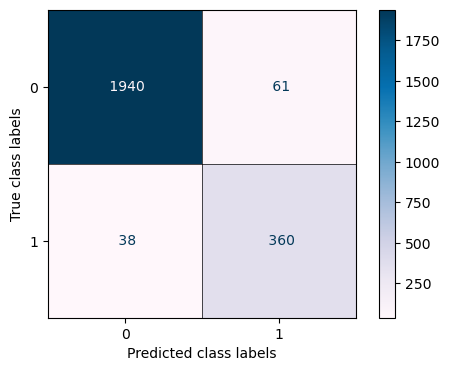

In [141]:
# Creating the arrays for the matrix:
predict = rf2.best_estimator_.predict(X_test)
c_matrix = confusion_matrix(y_test, predict)

# Plotting the matrix:
matrix_fig = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
fig, ax = plt.subplots(figsize=(6, 4))
matrix_fig.plot(values_format=" ", cmap = "PuBu", ax = ax)

# Adding some delimiting lines
ax.axhline(y = 0.5, color = "k", linestyle = '-', linewidth = 0.5)
ax.axvline(x = 0.5, color = "k", linestyle = '-', linewidth = 0.5)

ax.set_xlabel("Predicted class labels")
ax.set_ylabel("True class labels")

plt.show()

Link to [Random Forest no. 1 CM](#rf2_cm)

**In this confusion matrix, the results are split as follows:**
1. **True negatives** are displayed in the **top-left square**:
<br>1940 employees didn't leave and the model predicted accurately as staying
<br>
<br>
2. **False positives** are displayed in the **top-right square**:
<br>61 employees didn't leave, but the model inaccurately predicted as leaving
<br>
<br>
3. **False negatives** are displayed in the **bottom-left square**:
<br>38 employees left, but the model inaccurately predicted as staying
<br>
<br>
4. **True positives** are displayed in the **bottom-right square**:
<br>360 employees left and the model predicted accurately as leaving
<br>

**Given these results, we see that our model can still make a few errors by falsely identifying instances as positive when they are actually negative**.
<br>
In this case, the model tends to be overly optimistic in predicting positive outcomes. This might indicate that the model has a bias towards predicting positive results, and it's not as good at correctly identifying instances where the outcome should be negative.
***
Even so, considering there are few false positive and false negative results, we can conclude that our model is reliable.

Decision tree importance:

In [142]:
# Extract the feature importances metrics
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = ["gini_importance"], index = X.columns)
tree2_importances = tree2_importances.sort_values(by = "gini_importance", ascending = False)

# Isolate the first 10 features by highest importance:
tree2_importances = tree2_importances[tree2_importances["gini_importance"] != 0].head(10)
tree2_importances

,gini_importance
number_project,0.346186
last_evaluation,0.340522
job_tenure,0.214254
overworked,0.097422
department_support,0.000443
work_accident,0.000323
department_sales,0.000300
salary,0.000153
department_IT,0.000132
department_hr,0.000112


For a better representation, we can create a plot to visualize these values.

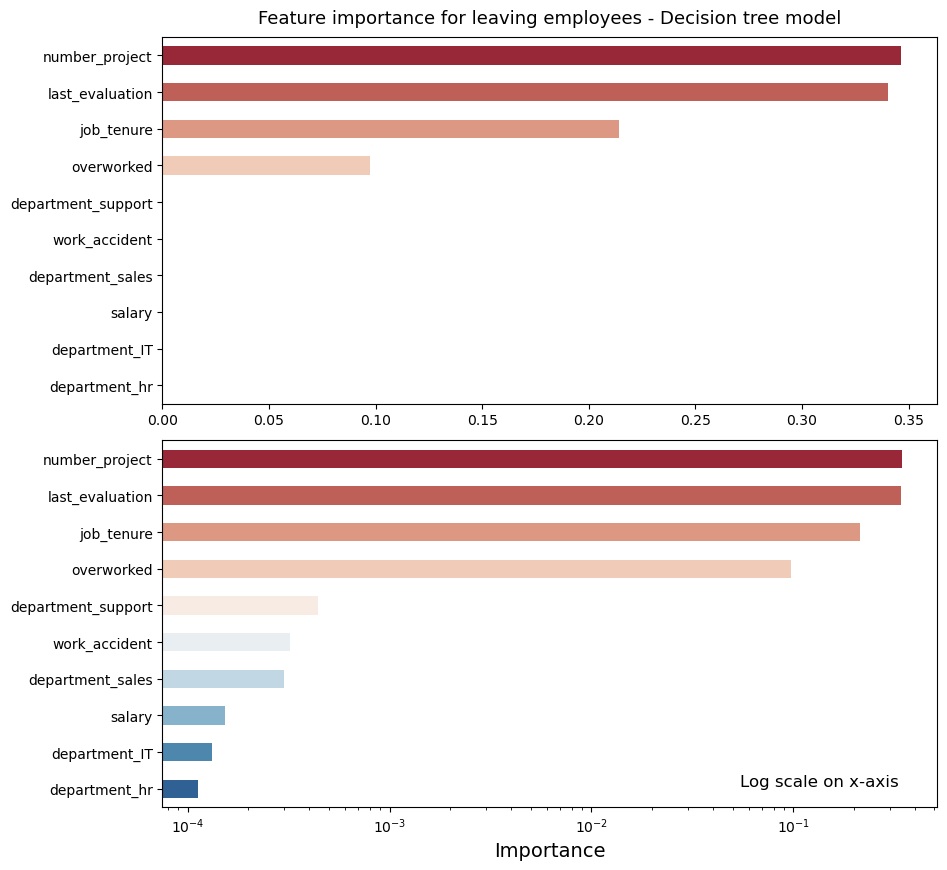

In [143]:
# Creating a barchart:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (10, 10))

sns_fig = sns.barplot(data = tree2_importances, x = "gini_importance", y = tree2_importances.index, orient = "h",
                     palette = "RdBu", width = 0.5, ax = ax[0])
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
sns_fig.set_xlabel(None)
sns_fig.set_title("Feature importance for leaving employees - Decision tree model", fontsize = 13, pad = 10)

# Creating another barchart, using log scale for better understanding:
sns_fig2 = sns.barplot(data = tree2_importances, x = "gini_importance", y = tree2_importances.index, orient = "h",
                     palette = "RdBu", width = 0.5, ax = ax[1])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns_fig2.set_xscale("log")
sns_fig2.set_xlabel("Importance", fontsize = 14)

# Add a markdown text annotation for the second plot
info = "Log scale on x-axis"
plt.annotate(info, xy = (0.95, 0.05), xycoords = "axes fraction", ha = "right", va = "bottom", fontsize = 12)

# Adjust spacing between subplots
plt.subplots_adjust(hspace = 0.1)

plt.show()



Given these plots, we can clearly see that **our Decision Tree model found the number of projects, evaluation scores, time spent in a company and working way over the normal amount in a month are the most important factors which influence an employee's decision to leave or stay in the company**.

Random forest model importances:

In [144]:
# Extract the feature importances metrics
rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_, columns = ["gini_importance"], index = X.columns)
rf2_importances = rf2_importances.sort_values(by = "gini_importance", ascending = False)

# Isolate the first 10 features by highest importance:
rf2_importances = rf2_importances[rf2_importances["gini_importance"] != 0].head(10)
rf2_importances

,gini_importance
last_evaluation,0.357119
number_project,0.352895
job_tenure,0.196757
overworked,0.090080
department_sales,0.000638
department_support,0.000545
salary,0.000535
department_IT,0.000356
department_technical,0.000338
department_product_mng,0.000143


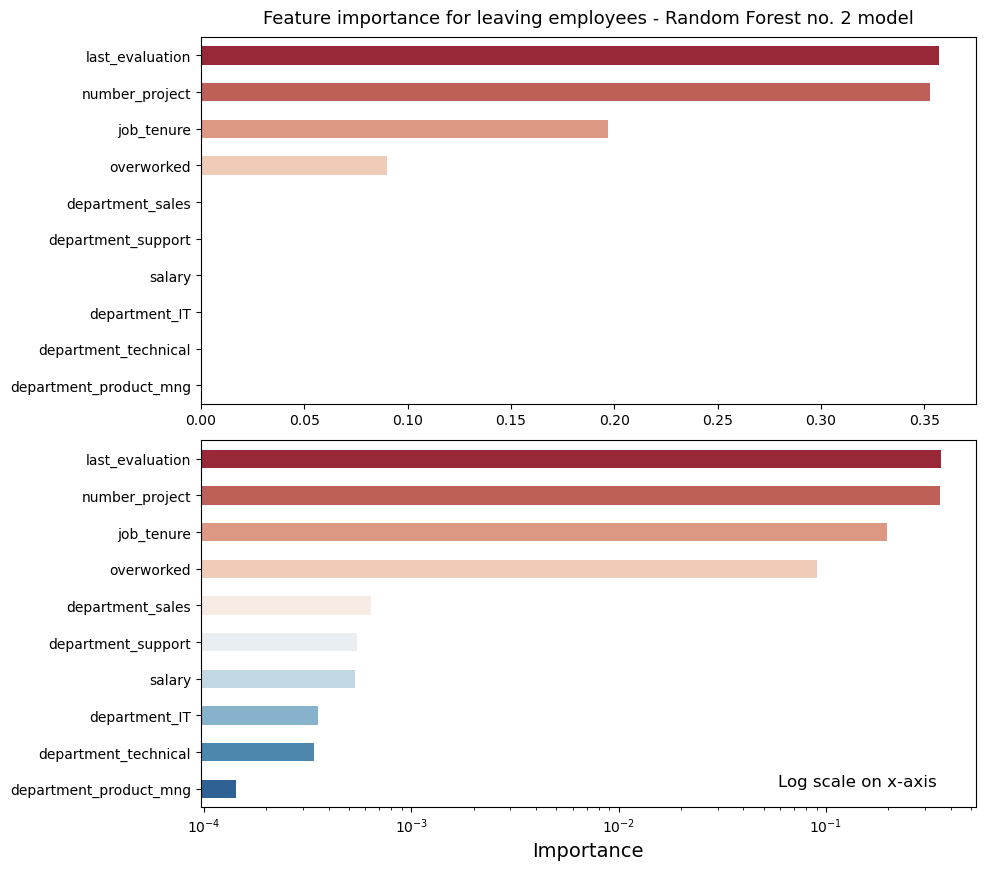

In [145]:
# Creating barcharts:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (10, 10))

sns_fig = sns.barplot(data = rf2_importances, x = "gini_importance", y = rf2_importances.index, orient = "h",
                     palette = "RdBu", width = 0.5, ax = ax[0])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 13)
sns_fig.set_xlabel(None)
sns_fig.set_title("Feature importance for leaving employees - Random Forest no. 2 model", fontsize = 13, pad = 10)

sns_fig2 = sns.barplot(data = rf2_importances, x = "gini_importance", y = rf2_importances.index, orient = "h",
                     palette = "RdBu", width = 0.5, ax = ax[1])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns_fig2.set_xscale("log")
sns_fig2.set_xlabel("Importance", fontsize = 14)

# Add a markdown text annotation for the second plot
info = "Log scale on x-axis"
plt.annotate(info, xy = (0.95, 0.05), xycoords = "axes fraction", ha = "right", va = "bottom", fontsize = 12)

# Adjust spacing between subplots
plt.subplots_adjust(hspace = 0.1)

plt.show()

**Our Random Forest model came to the same conclusion, which is that the number of projects, evaluation scores, time spent in a company and working way over the normal amount in a month are the most important factors which influence an employee's decision to leave or stay in the company.**

### Feature importance summary for the implemented machine learning models:
**1.** **<u>Decision Tree Model</u>:**
<br>

**Key Features**:
 - **Number of Projects**: Identified as the most crucial factor influencing employee retention.
 - **Last Evaluation**: Significant impact on predicting employee decisions.
 - **Job Tenure**: The duration of employment also plays a substantial role.
 - **Overworked**: Indicates employees working significantly more than the norm, contributing to the decision.

**2.** **<u>Random Forest Model</u>**:
<br>

**Key Features**:
 - **Last Evaluation**: Identified as the most crucial factor, closely followed by the number of projects.
 - **Job Tenure**: Remains an influential factor.
 - **Overworked**: Similar to the Decision Tree model, indicates the impact of excessive workload.
